## Time Series Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from prepare import prepare_power_data, prepare_store_data

import warnings
warnings.filterwarnings('ignore')

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Germany Power Generation

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

In [3]:
power = prepare_power_data()

In [4]:
power

consumption     wind   solar  wind+solar  month  year  \
date                                                                
2006-01-01   1069.18400    0.000   0.000       0.000      1  2006   
2006-01-02   1380.52100    0.000   0.000       0.000      1  2006   
2006-01-03   1442.53300    0.000   0.000       0.000      1  2006   
2006-01-04   1457.21700    0.000   0.000       0.000      1  2006   
2006-01-05   1477.13100    0.000   0.000       0.000      1  2006   
...                 ...      ...     ...         ...    ...   ...   
2017-12-27   1263.94091  394.507  16.530     411.037     12  2017   
2017-12-28   1299.86398  506.424  14.162     520.586     12  2017   
2017-12-29   1295.08753  584.277  29.854     614.131     12  2017   
2017-12-30   1215.44897  721.247   7.467     728.714     12  2017   
2017-12-31   1107.11488  721.176  19.980     741.156     12  2017   

            wind_and_solar  
date                        
2006-01-01           0.000  
2006-01-02           0.000  
2006-01-03           0.000  
2006-01-04           0.000  
2006-01-05           0.000  
...                    ...  
2017-12-27         411.037  
2017-12-28         520.586  
2017-12-29         614.131  
2017-12-30         728.714  
2017-12-31         741.156  

[4383 rows x 7 columns]

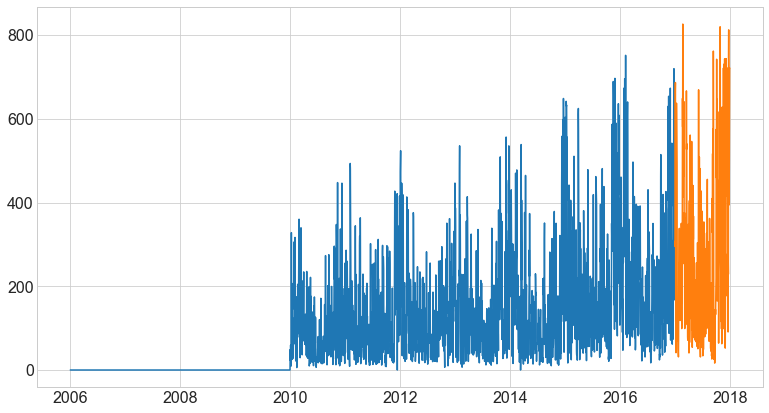

In [5]:
train = power[:'2016'] # includes 2016
test = power['2017']

plt.plot(train.index, train.wind)
plt.plot(test.index, test.wind)

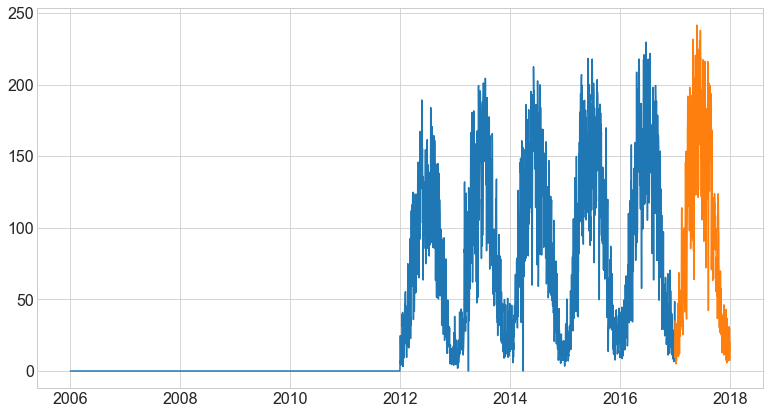

In [6]:
train = power[:'2016'] # includes 2016
test = power['2017']

plt.plot(train.index, train.solar)
plt.plot(test.index, test.solar)

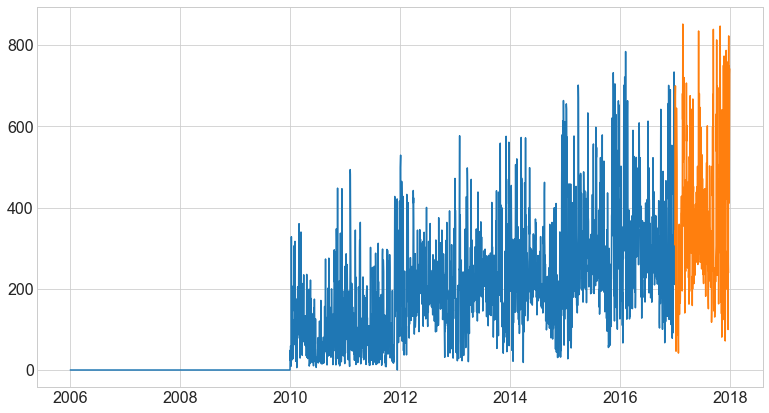

In [7]:
train = power[:'2016'] # includes 2016
test = power['2017']

plt.plot(train.index, train.wind_and_solar)
plt.plot(test.index, test.wind_and_solar)

### Don't consider the time series

In [8]:
y1 = train.wind
y2 = train.solar
y3 = train.wind_and_solar

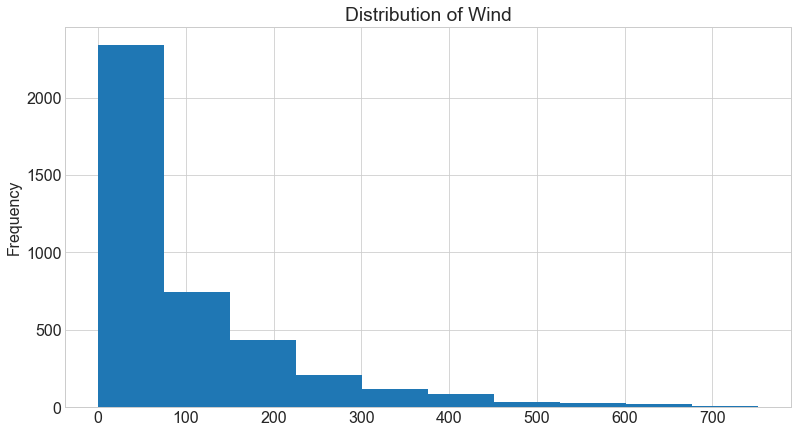

In [9]:
y1.plot.hist()
plt.title('Distribution of Wind')
plt.show()

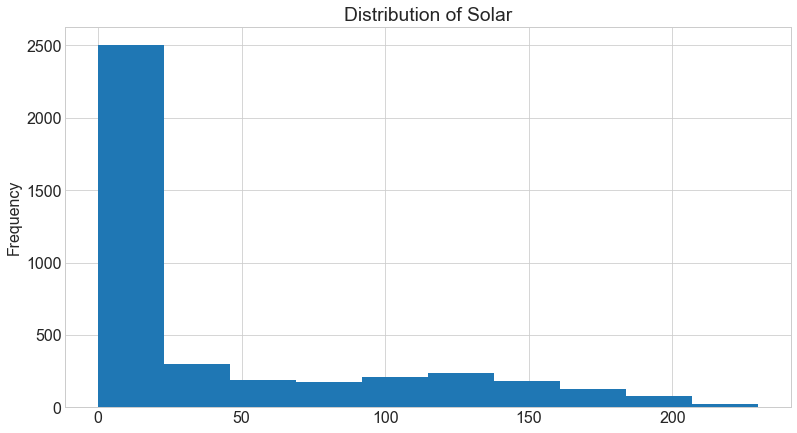

In [10]:
y2.plot.hist()
plt.title('Distribution of Solar')
plt.show()

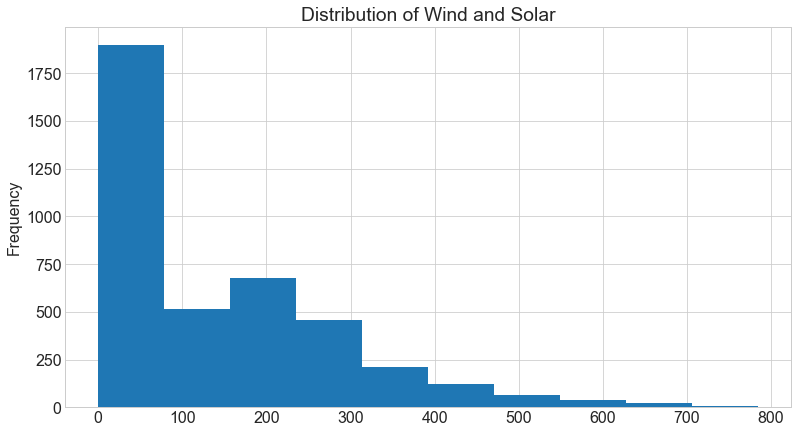

In [11]:
y3.plot.hist() 
plt.title('Distribution of Wind and Solar')
plt.show()

In [12]:
train['weekday'] = train.index.day_name()

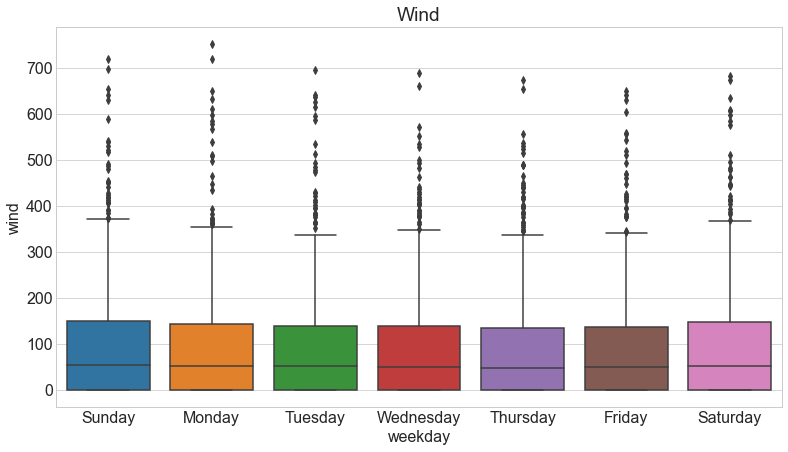

In [13]:
sns.boxplot(data = train, y = 'wind', x = 'weekday')
plt.title('Wind')
plt.show()

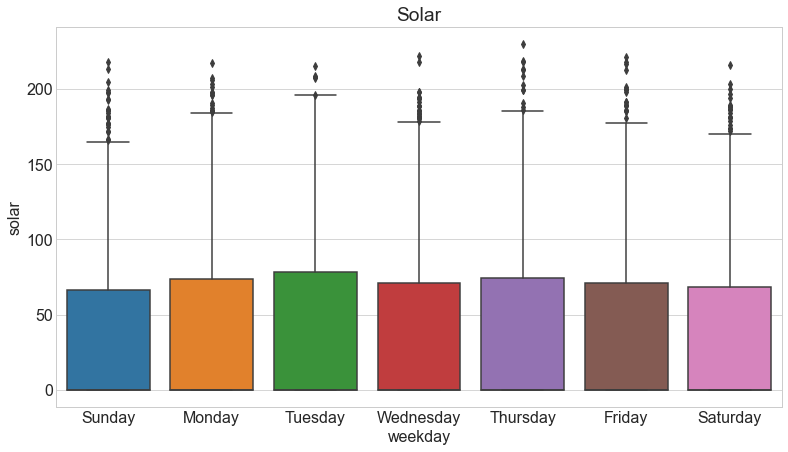

In [14]:
sns.boxplot(data = train, y = 'solar', x = 'weekday')
plt.title('Solar')
plt.show()

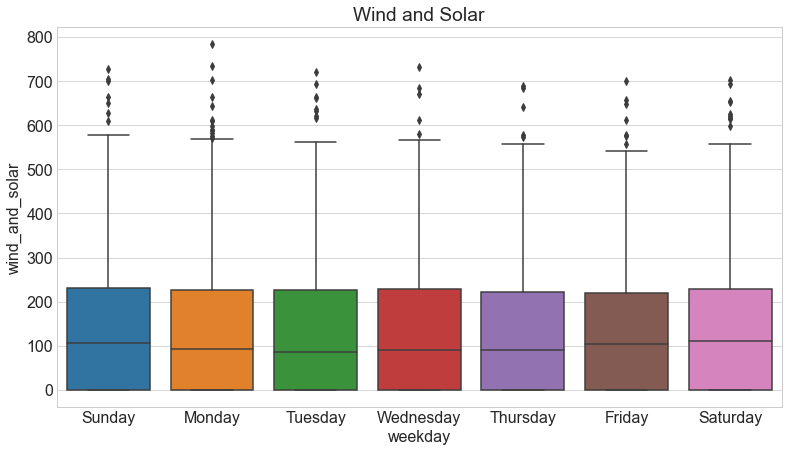

In [15]:
sns.boxplot(data = train, y = 'wind_and_solar', x = 'weekday')
plt.title('Wind and Solar')
plt.show()

### Visualize the target over time

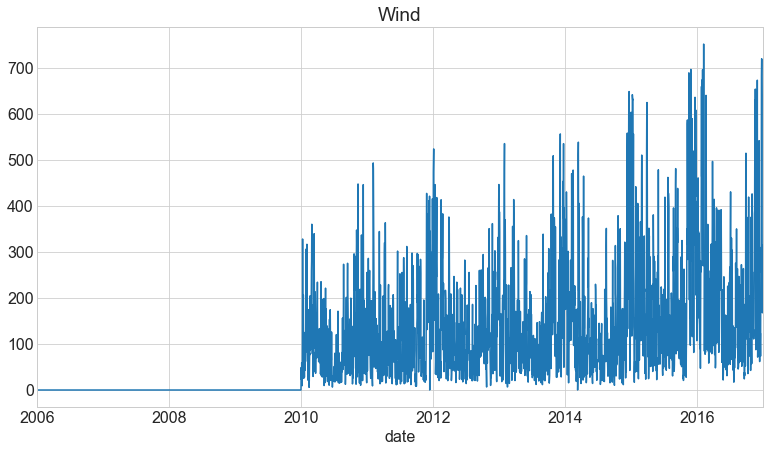

In [16]:
y1.plot()
plt.title('Wind')
plt.show()

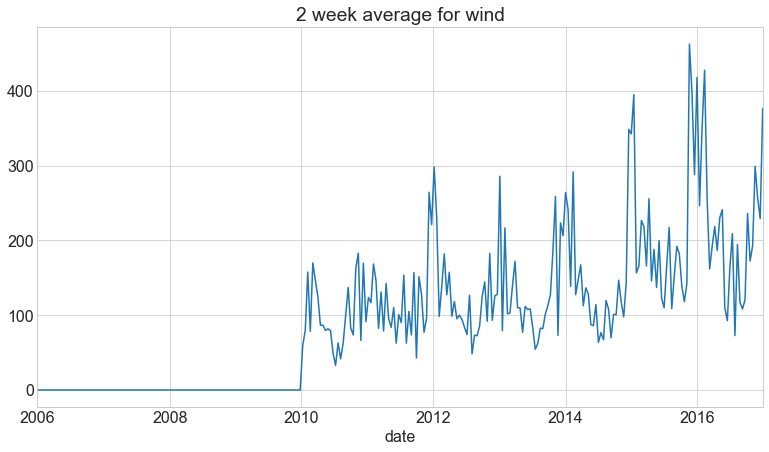

In [17]:
y1.resample('2W').mean().plot(title='2 week average for wind')
plt.show()

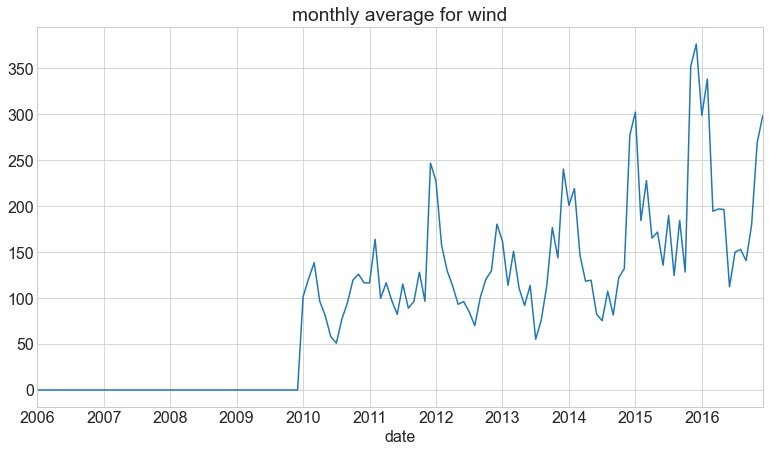

In [18]:
y1.resample('M').mean().plot(title='monthly average for wind')
plt.show()

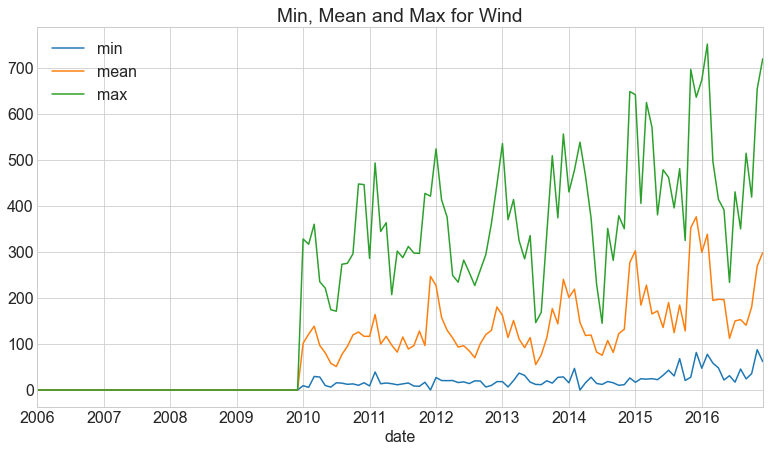

In [19]:
y1.resample('M').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Mean and Max for Wind')
plt.show()

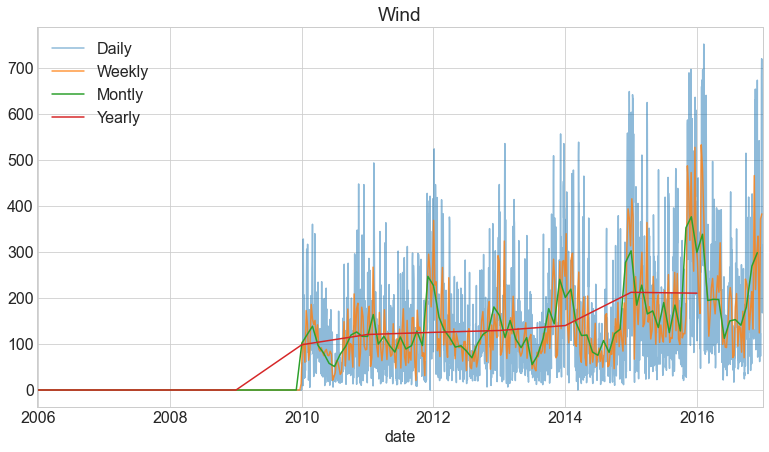

In [20]:
y1.resample('D').mean().plot(alpha=.5, label='Daily')
y1.resample('W').mean().plot(alpha=.8, label='Weekly')
y1.resample('M').mean().plot(label='Montly')
y1.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Wind')
plt.show()

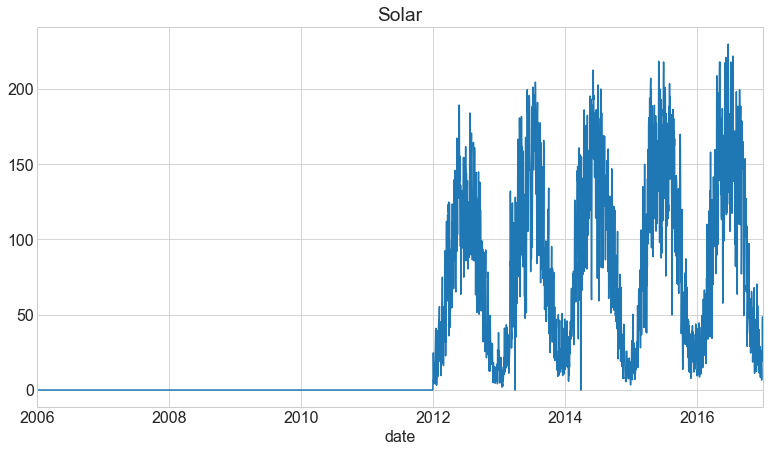

In [21]:
y2.plot()
plt.title('Solar')
plt.show()

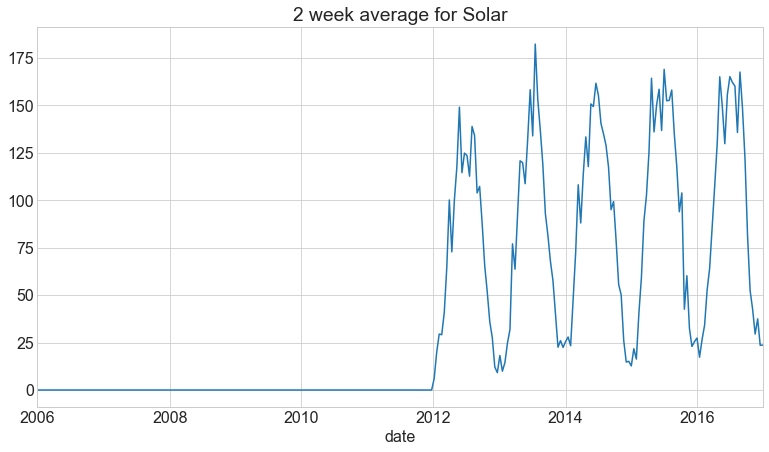

In [22]:
y2.resample('2W').mean().plot(title='2 week average for Solar')
plt.show()

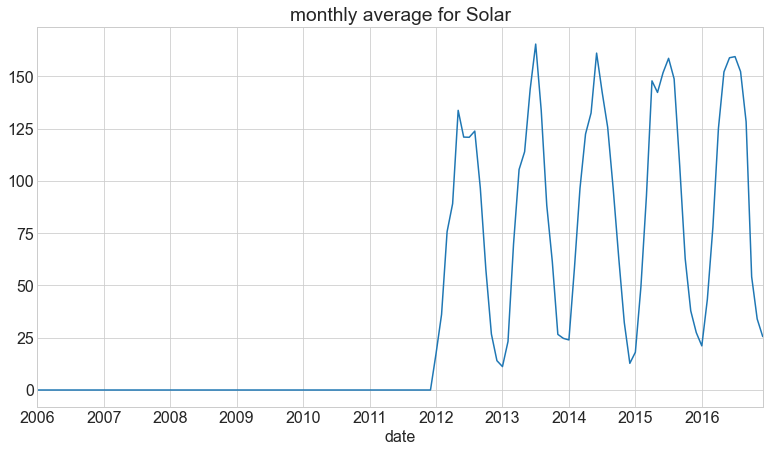

In [23]:
y2.resample('M').mean().plot(title='monthly average for Solar')
plt.show()

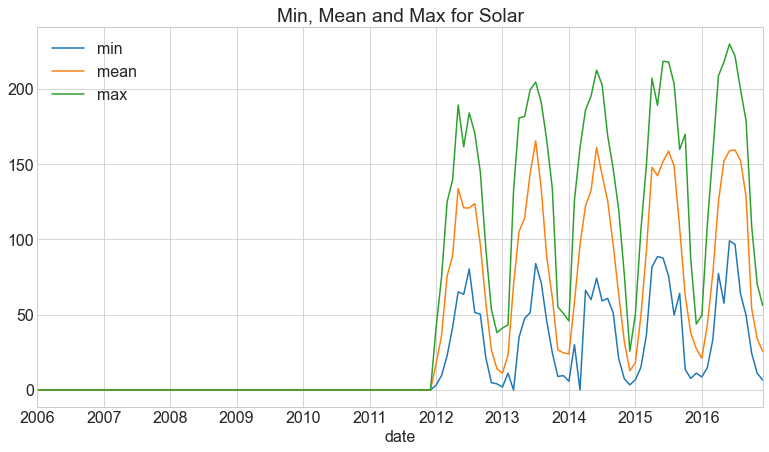

In [24]:
y2.resample('M').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Mean and Max for Solar')
plt.show()

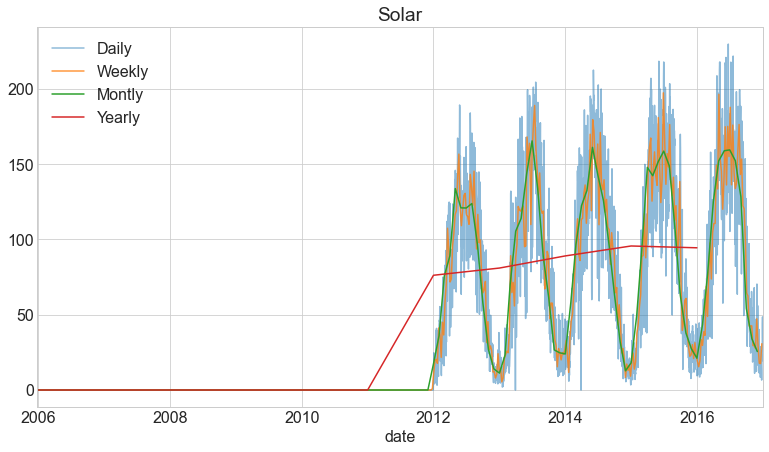

In [25]:
y2.resample('D').mean().plot(alpha=.5, label='Daily')
y2.resample('W').mean().plot(alpha=.8, label='Weekly')
y2.resample('M').mean().plot(label='Montly')
y2.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Solar')
plt.show()

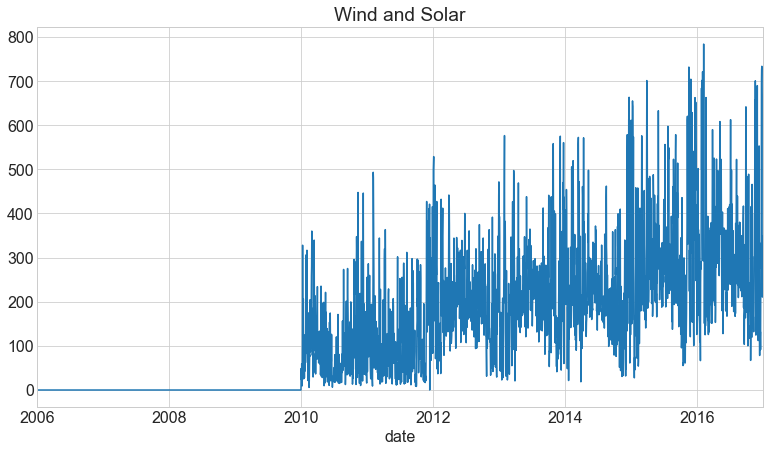

In [26]:
y3.plot()
plt.title('Wind and Solar')
plt.show()

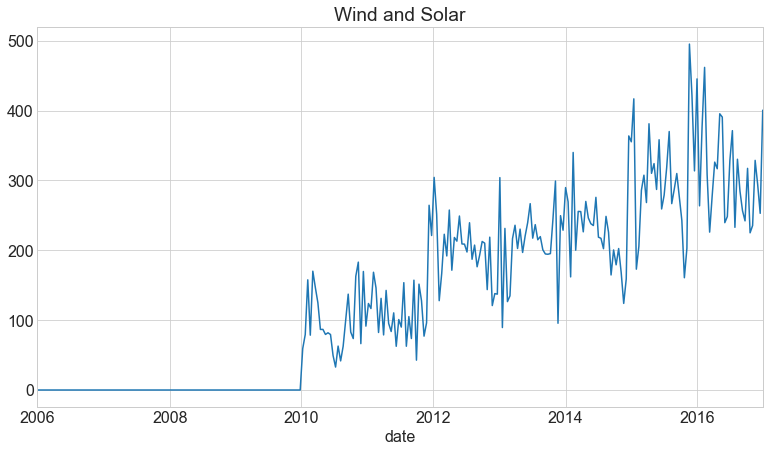

In [27]:
y3.resample('2W').mean().plot(title='2 week average')
plt.title('Wind and Solar')
plt.show()

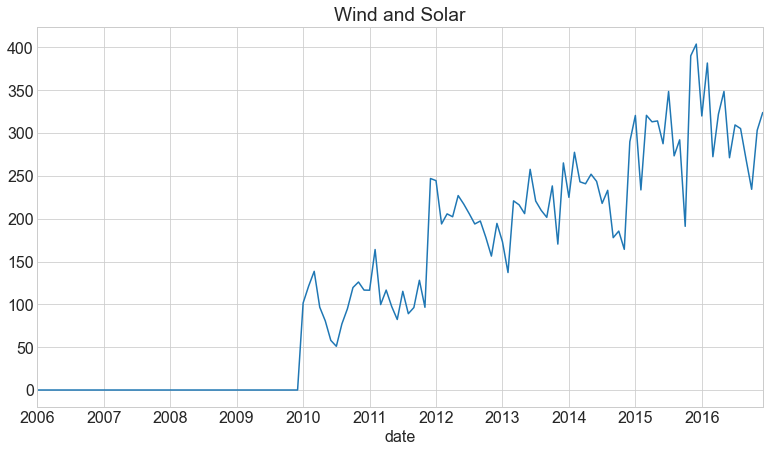

In [28]:
y3.resample('M').mean().plot(title='monthly average')
plt.title('Wind and Solar')
plt.show()

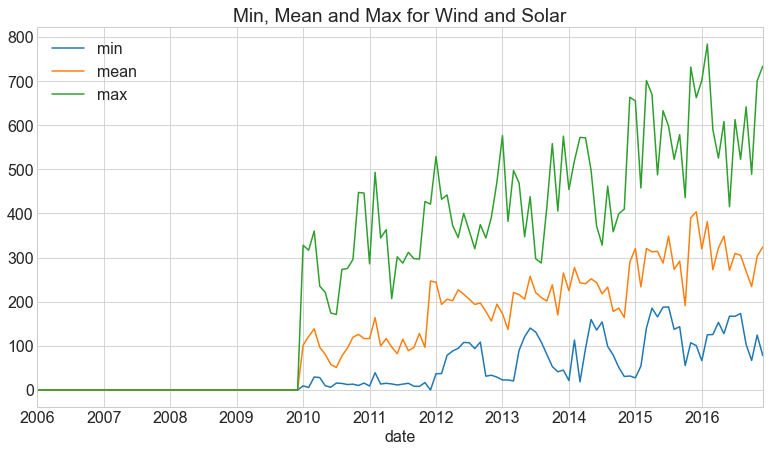

In [29]:
y3.resample('M').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Mean and Max for Wind and Solar')
plt.show()

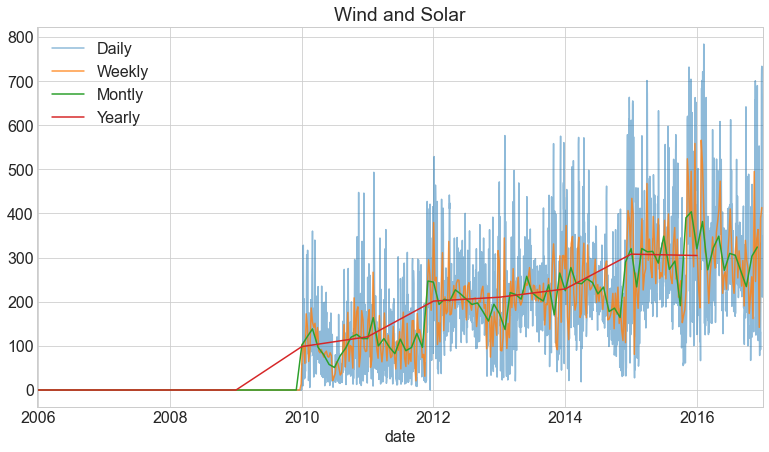

In [30]:
y3.resample('D').mean().plot(alpha=.5, label='Daily')
y3.resample('W').mean().plot(alpha=.8, label='Weekly')
y3.resample('M').mean().plot(label='Montly')
y3.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Wind and Solar')
plt.show()

### Visualize change over time

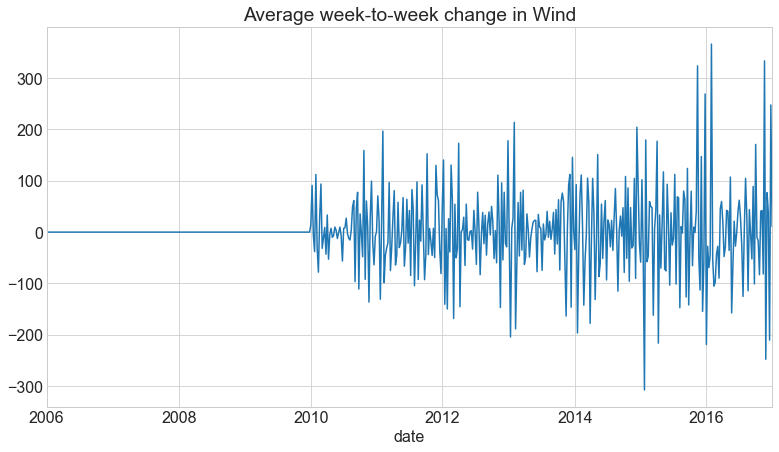

In [31]:
y1.resample('W').mean().diff().plot(title='Average week-to-week change in Wind')
plt.show()

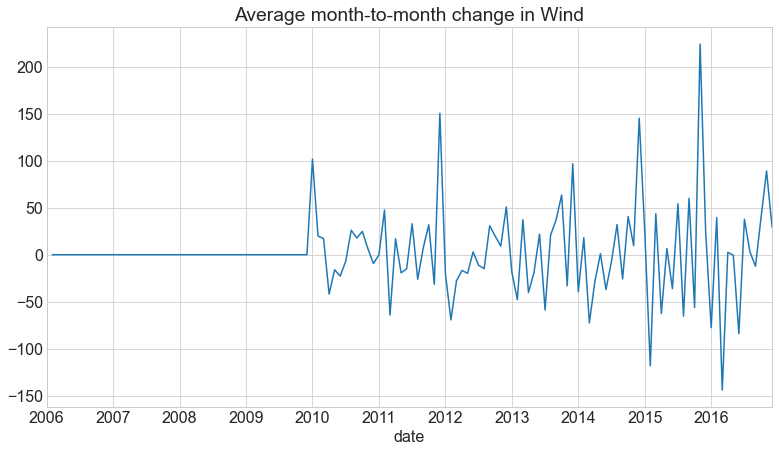

In [32]:
y1.resample('M').mean().diff().plot(title='Average month-to-month change in Wind')
plt.show()

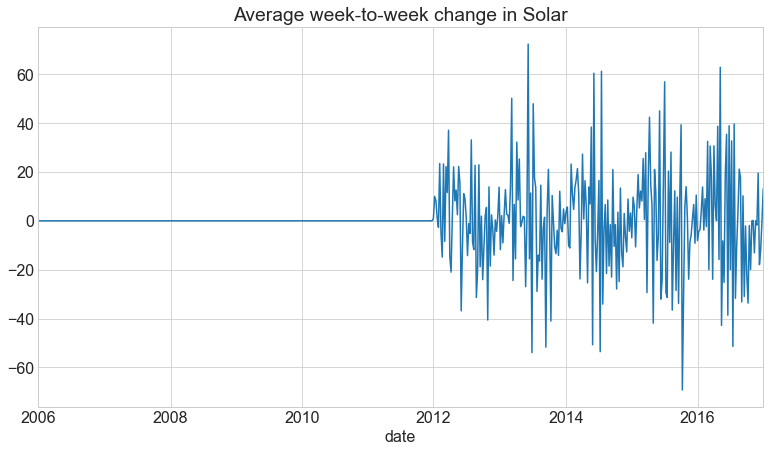

In [33]:
y2.resample('W').mean().diff().plot(title='Average week-to-week change in Solar')
plt.show()

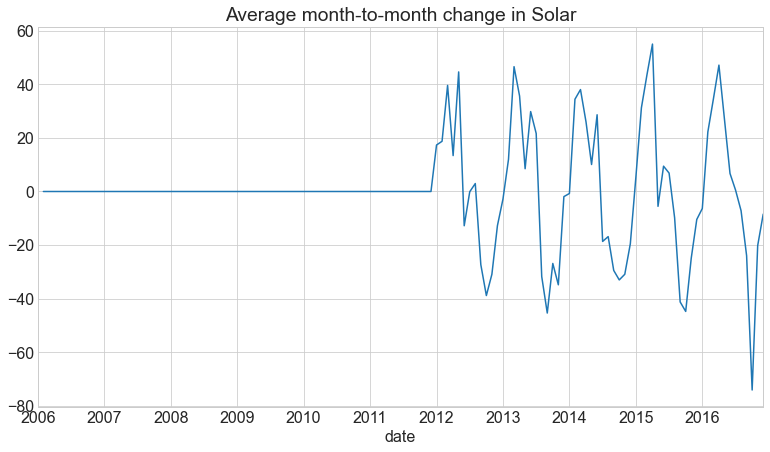

In [34]:
y2.resample('M').mean().diff().plot(title='Average month-to-month change in Solar')
plt.show()

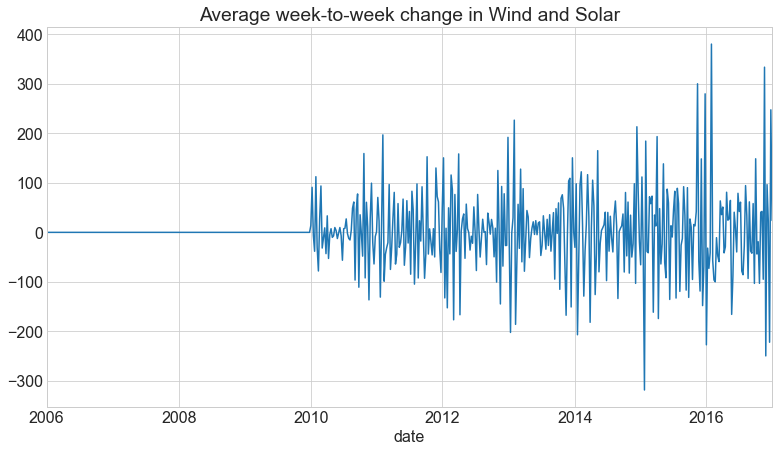

In [35]:
y3.resample('W').mean().diff().plot(title='Average week-to-week change in Wind and Solar')
plt.show()

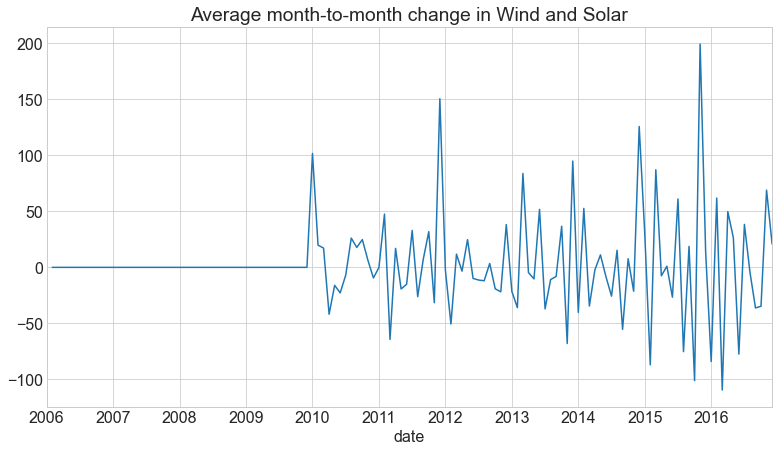

In [36]:
y3.resample('M').mean().diff().plot(title='Average month-to-month change in Wind and Solar')
plt.show()

### Seasonal Plot

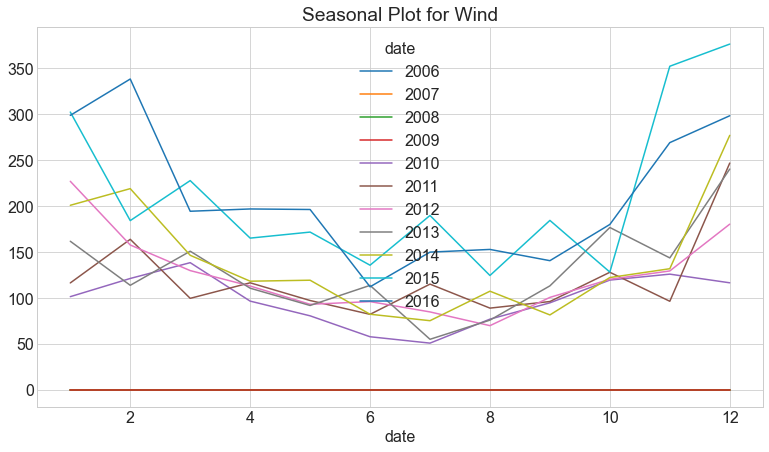

In [37]:
# .unstack turns an index level into columns, year into columns
y1.groupby([y1.index.year, y1.index.month]).mean().unstack(0).plot(title='Seasonal Plot for Wind')
plt.show()

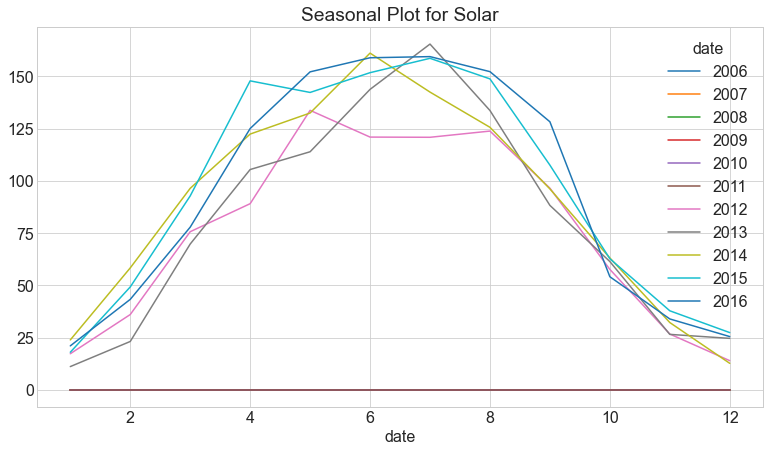

In [38]:
# .unstack turns an index level into columns, year into columns
y2.groupby([y2.index.year, y2.index.month]).mean().unstack(0).plot(title='Seasonal Plot for Solar')
plt.show()

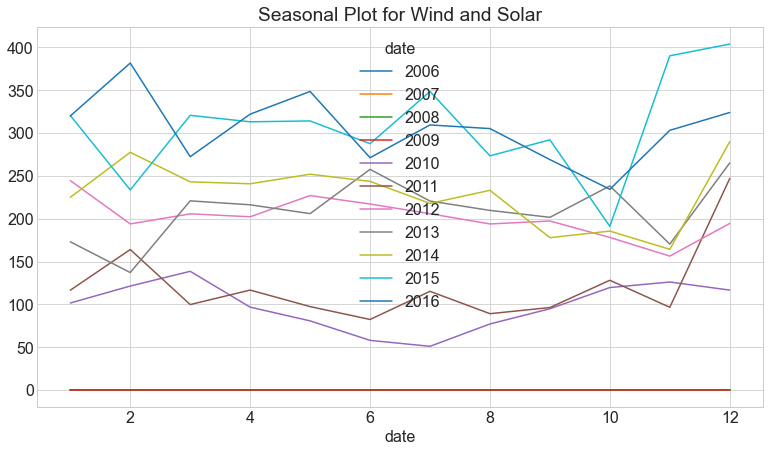

In [39]:
# .unstack turns an index level into columns, year into columns
y3.groupby([y3.index.year, y3.index.month]).mean().unstack(0).plot(title='Seasonal Plot for Wind and Solar')
plt.show()

### Seasonal Subseries Plot

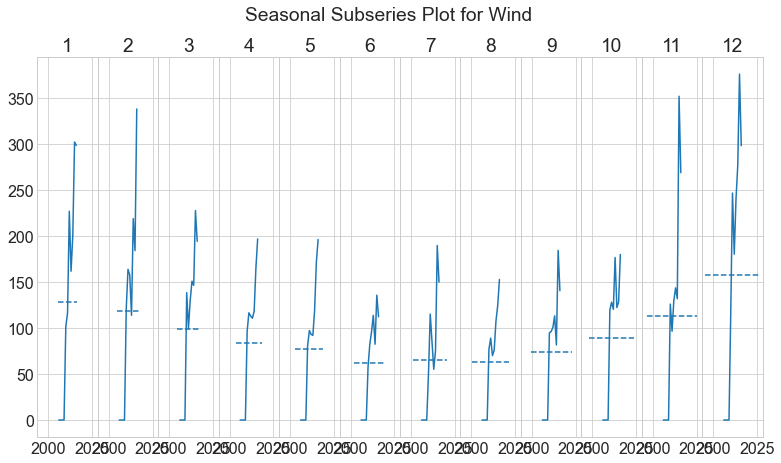

In [40]:
#with this unstack, the months become columns
table = y1.groupby([y1.index.year, y1.index.month]).mean().unstack()

#puts together the 12(monthly) subplots together
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    #creates the average line(dashed)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot for Wind') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

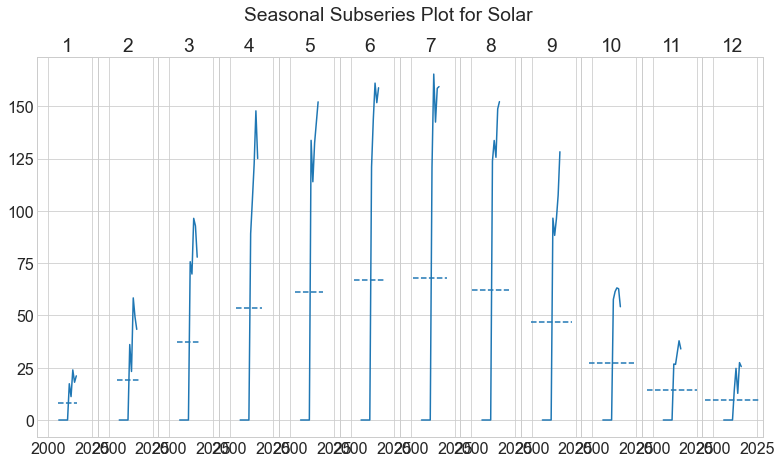

In [41]:
#with this unstack, the months become columns
table = y2.groupby([y2.index.year, y2.index.month]).mean().unstack()

#puts together the 12(monthly) subplots together
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    #creates the average line(dashed)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot for Solar') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

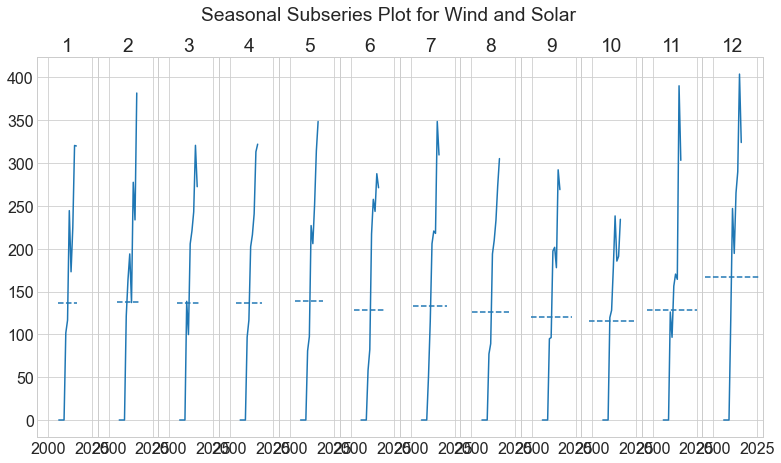

In [42]:
#with this unstack, the months become columns
table = y3.groupby([y3.index.year, y3.index.month]).mean().unstack()

#puts together the 12(monthly) subplots together
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    #creates the average line(dashed)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot for Wind and Solar') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### Lag Plot

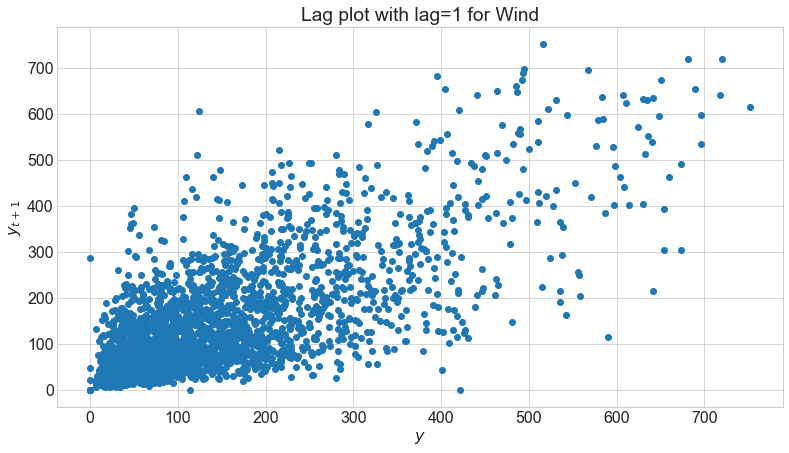

In [43]:
plt.scatter(y1, y1.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 for Wind')
plt.show()

consumption   this_week      solar  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

            wind_and_solar  the_next_week  
date                                       
2006-01-01        0.000000       0.000000  
2006-01-08        0.000000       0.000000  
2006-01-15        0.000000       0.000000  
2006-01-22        0.000000       0.000000  
2006-01-29        0.000000       0.000000  
...                    ...            ...  
2016-12-04      342.270429     334.445429  
2016-12-11      363.762429     124.087286  
2016-12-18      141.891286     371.722000  
2016-12-25      389.307857     382.677167  
2017-01-01      413.410000            NaN  

[575 rows x 8 columns]

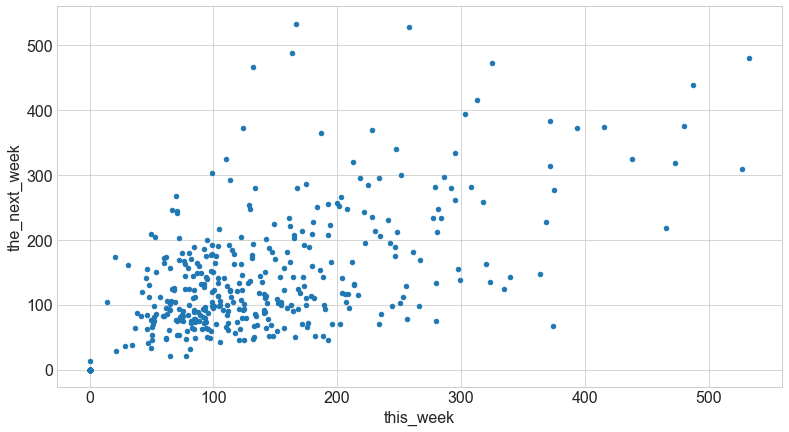

In [44]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.wind.shift(-1)
weekly = weekly.rename(columns={'wind': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

consumption   this_week      solar  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

            wind_and_solar  12_weeks_out  
date                                      
2006-01-01        0.000000           0.0  
2006-01-08        0.000000           0.0  
2006-01-15        0.000000           0.0  
2006-01-22        0.000000           0.0  
2006-01-29        0.000000           0.0  
...                    ...           ...  
2016-12-04      342.270429           NaN  
2016-12-11      363.762429           NaN  
2016-12-18      141.891286           NaN  
2016-12-25      389.307857           NaN  
2017-01-01      413.410000           NaN  

[575 rows x 8 columns]

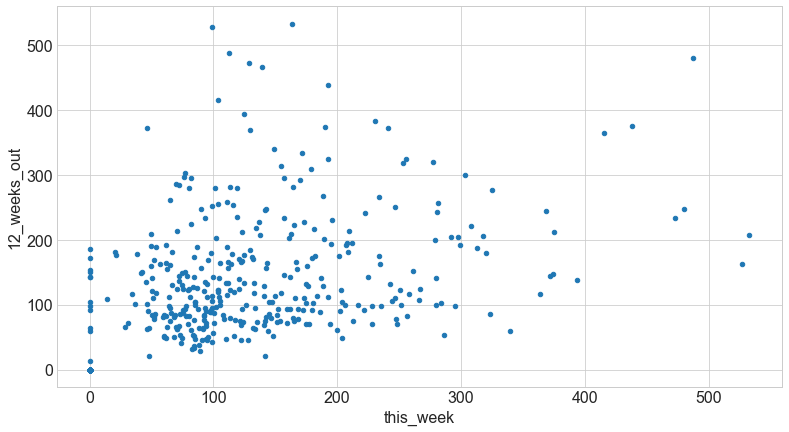

In [45]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.wind.shift(-12)
weekly = weekly.rename(columns={'wind': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

consumption   this_week      solar  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

            wind_and_solar  half_a_year_later  
date                                           
2006-01-01        0.000000                0.0  
2006-01-08        0.000000                0.0  
2006-01-15        0.000000                0.0  
2006-01-22        0.000000                0.0  
2006-01-29        0.000000                0.0  
...                    ...                ...  
2016-12-04      342.270429                NaN  
2016-12-11      363.762429                NaN  
2016-12-18      141.891286                NaN  
2016-12-25      389.307857                NaN  
2017-01-01      413.410000                NaN  

[575 rows x 8 columns]

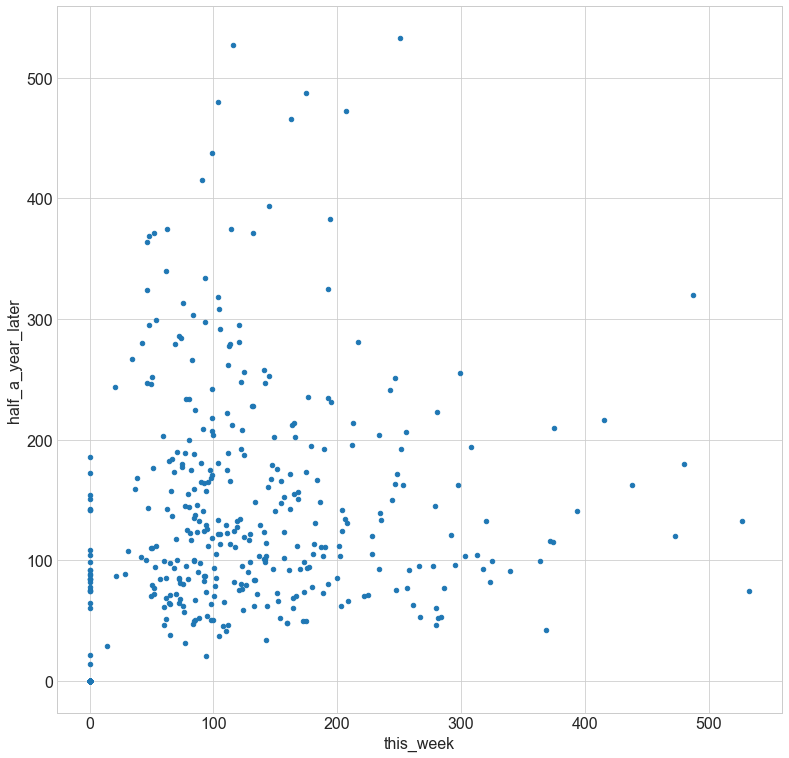

In [46]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.wind.shift(-26)
weekly = weekly.rename(columns={'wind': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

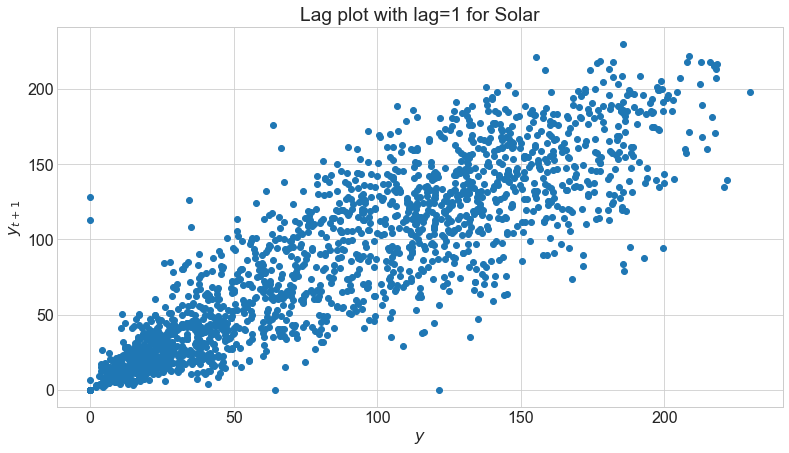

In [47]:
plt.scatter(y2, y2.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 for Solar')
plt.show()

consumption        wind  this_week  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

            wind_and_solar  the_next_week  
date                                       
2006-01-01        0.000000       0.000000  
2006-01-08        0.000000       0.000000  
2006-01-15        0.000000       0.000000  
2006-01-22        0.000000       0.000000  
2006-01-29        0.000000       0.000000  
...                    ...            ...  
2016-12-04      342.270429      29.317000  
2016-12-11      363.762429      17.804000  
2016-12-18      141.891286      17.585857  
2016-12-25      389.307857      30.732833  
2017-01-01      413.410000            NaN  

[575 rows x 8 columns]

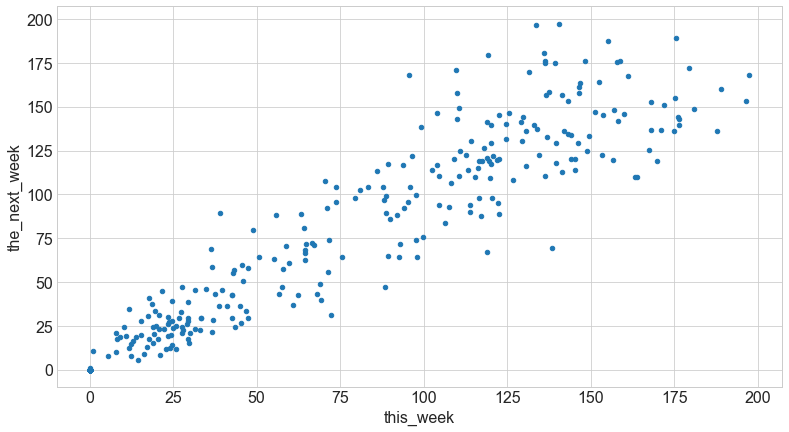

In [48]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.solar.shift(-1)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

consumption        wind  this_week  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

            wind_and_solar  12_weeks_out  
date                                      
2006-01-01        0.000000           0.0  
2006-01-08        0.000000           0.0  
2006-01-15        0.000000           0.0  
2006-01-22        0.000000           0.0  
2006-01-29        0.000000           0.0  
...                    ...           ...  
2016-12-04      342.270429           NaN  
2016-12-11      363.762429           NaN  
2016-12-18      141.891286           NaN  
2016-12-25      389.307857           NaN  
2017-01-01      413.410000           NaN  

[575 rows x 8 columns]

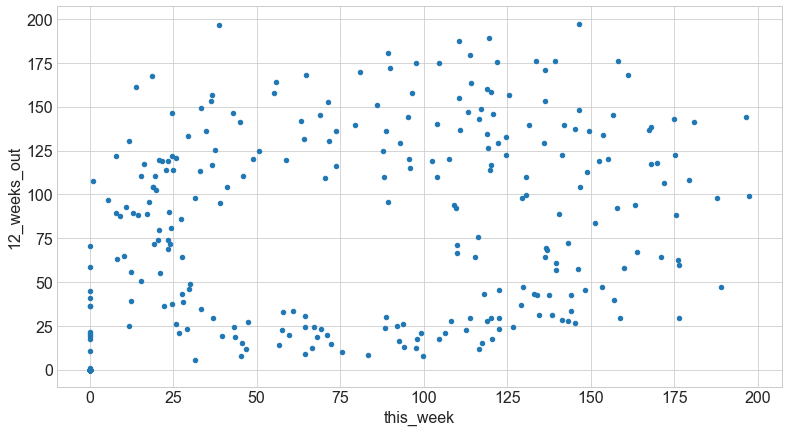

In [49]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.solar.shift(-12)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

consumption        wind  this_week  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

            wind_and_solar  half_a_year_later  
date                                           
2006-01-01        0.000000                0.0  
2006-01-08        0.000000                0.0  
2006-01-15        0.000000                0.0  
2006-01-22        0.000000                0.0  
2006-01-29        0.000000                0.0  
...                    ...                ...  
2016-12-04      342.270429                NaN  
2016-12-11      363.762429                NaN  
2016-12-18      141.891286                NaN  
2016-12-25      389.307857                NaN  
2017-01-01      413.410000                NaN  

[575 rows x 8 columns]

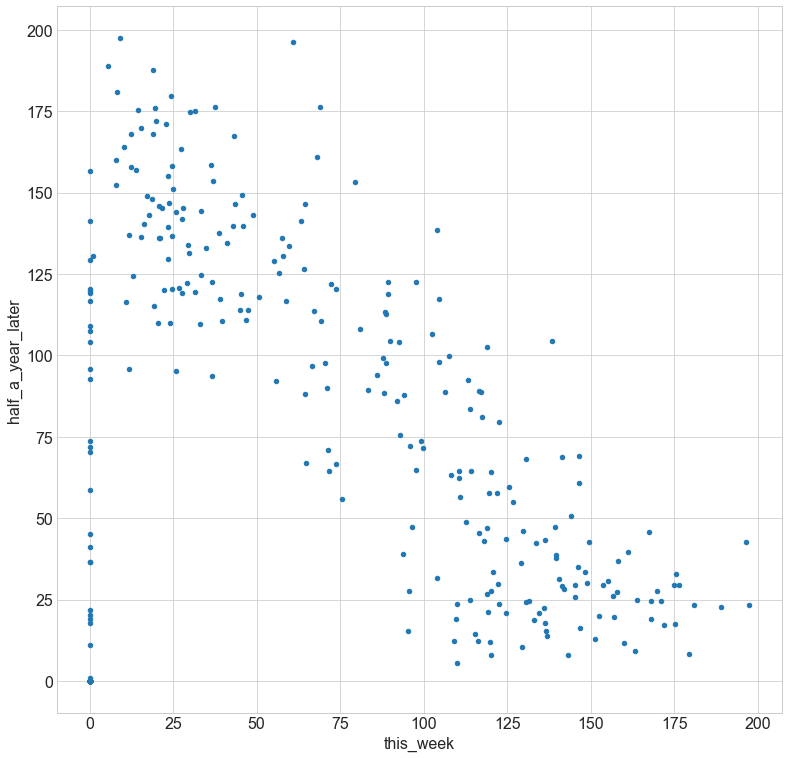

In [50]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.solar.shift(-26)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

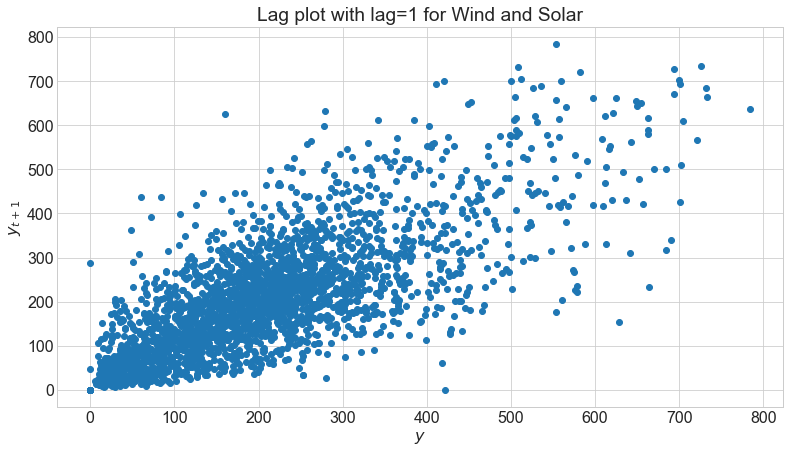

In [51]:
plt.scatter(y3, y3.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 for Wind and Solar')
plt.show()

consumption        wind      solar  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

             this_week  the_next_week  
date                                   
2006-01-01    0.000000       0.000000  
2006-01-08    0.000000       0.000000  
2006-01-15    0.000000       0.000000  
2006-01-22    0.000000       0.000000  
2006-01-29    0.000000       0.000000  
...                ...            ...  
2016-12-04  342.270429     363.762429  
2016-12-11  363.762429     141.891286  
2016-12-18  141.891286     389.307857  
2016-12-25  389.307857     413.410000  
2017-01-01  413.410000            NaN  

[575 rows x 8 columns]

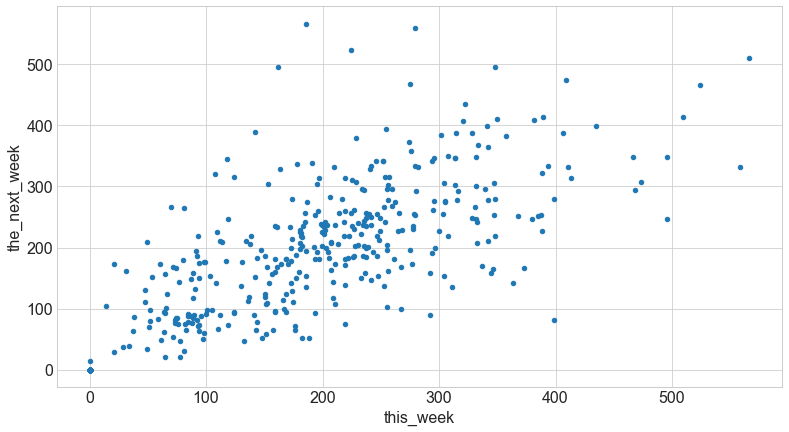

In [52]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.wind_and_solar.shift(-1)
weekly = weekly.rename(columns={'wind_and_solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

consumption        wind  this_week  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

            wind_and_solar  12_weeks_out  
date                                      
2006-01-01        0.000000           0.0  
2006-01-08        0.000000           0.0  
2006-01-15        0.000000           0.0  
2006-01-22        0.000000           0.0  
2006-01-29        0.000000           0.0  
...                    ...           ...  
2016-12-04      342.270429           NaN  
2016-12-11      363.762429           NaN  
2016-12-18      141.891286           NaN  
2016-12-25      389.307857           NaN  
2017-01-01      413.410000           NaN  

[575 rows x 8 columns]

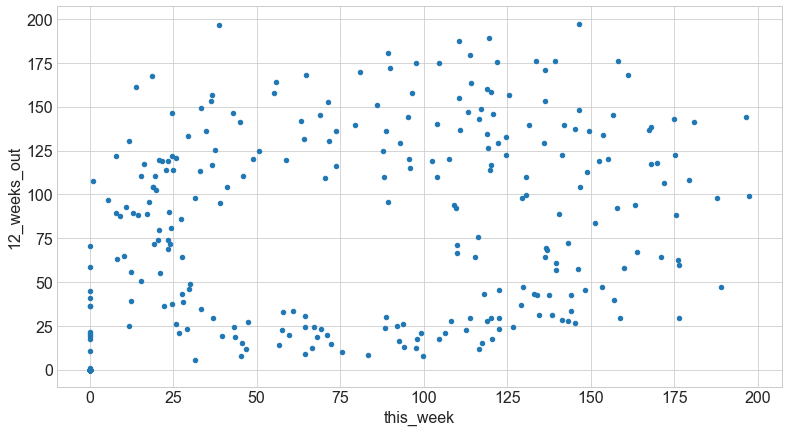

In [53]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.solar.shift(-12)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

consumption        wind      solar  wind+solar      month    year  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000   1.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000   1.000000  2006.0   
...                 ...         ...        ...         ...        ...     ...   
2016-12-04  1532.636714  295.015429  47.255000  342.270429  11.571429  2016.0   
2016-12-11  1538.948143  334.445429  29.317000  363.762429  12.000000  2016.0   
2016-12-18  1509.774000  124.087286  17.804000  141.891286  12.000000  2016.0   
2016-12-25  1417.620429  371.722000  17.585857  389.307857  12.000000  2016.0   
2017-01-01  1250.821167  382.677167  30.732833  413.410000  12.000000  2016.0   

             this_week  half_a_year_later  
date                                       
2006-01-01    0.000000                0.0  
2006-01-08    0.000000                0.0  
2006-01-15    0.000000                0.0  
2006-01-22    0.000000                0.0  
2006-01-29    0.000000                0.0  
...                ...                ...  
2016-12-04  342.270429                NaN  
2016-12-11  363.762429                NaN  
2016-12-18  141.891286                NaN  
2016-12-25  389.307857                NaN  
2017-01-01  413.410000                NaN  

[575 rows x 8 columns]

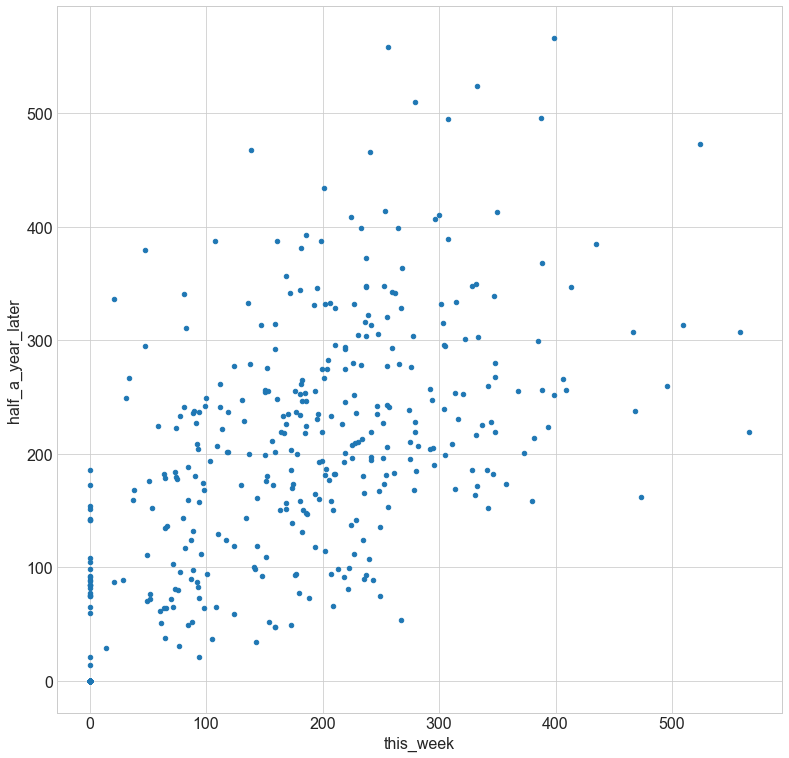

In [54]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.wind_and_solar.shift(-26)
weekly = weekly.rename(columns={'wind_and_solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

### Autocorrelation Plot

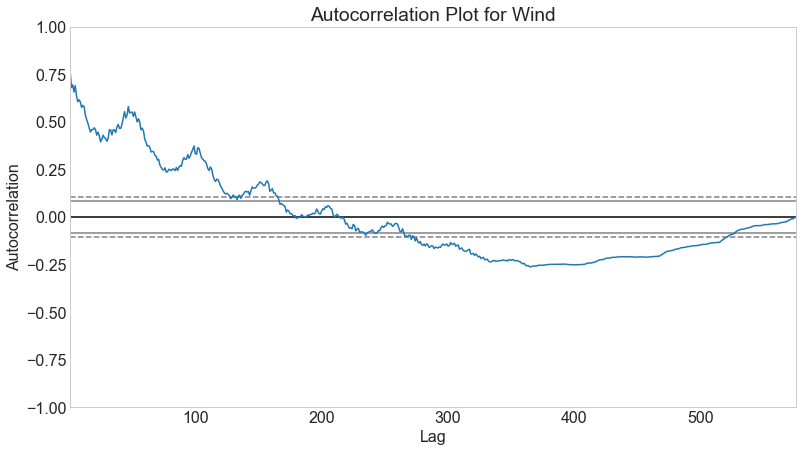

In [55]:
pd.plotting.autocorrelation_plot(train.wind.resample('W').mean())
plt.title("Autocorrelation Plot for Wind")
plt.show()

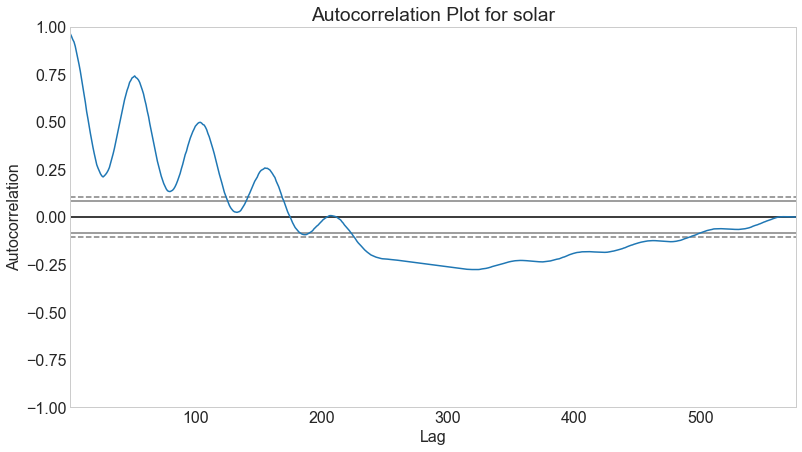

In [56]:
pd.plotting.autocorrelation_plot(train.solar.resample('W').mean())
plt.title("Autocorrelation Plot for solar")
plt.show()

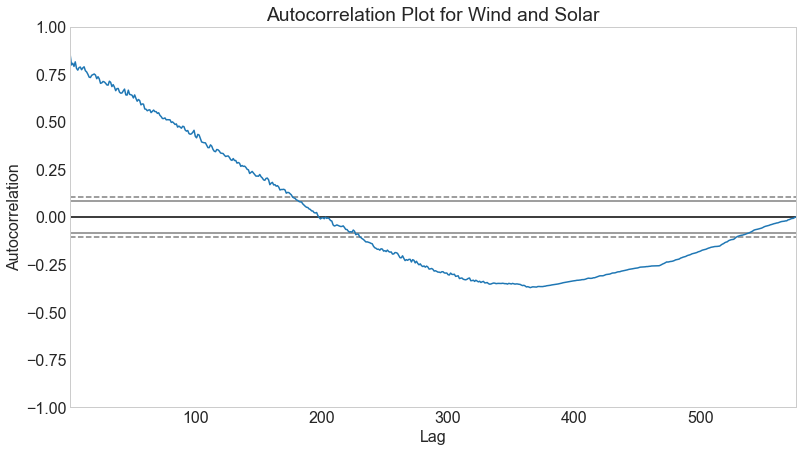

In [57]:
pd.plotting.autocorrelation_plot(train.wind_and_solar.resample('W').mean())
plt.title("Autocorrelation Plot for Wind and Solar")
plt.show()

### Seasonal Decomposition

In [58]:
y = train.wind.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend   seasonal  resid
date                                    
2006-01-01  0.0    NaN  37.343402    NaN
2006-01-08  0.0    NaN  86.129284    NaN
2006-01-15  0.0    NaN  83.660148    NaN
2006-01-22  0.0    NaN  67.158034    NaN
2006-01-29  0.0    NaN  20.688131    NaN

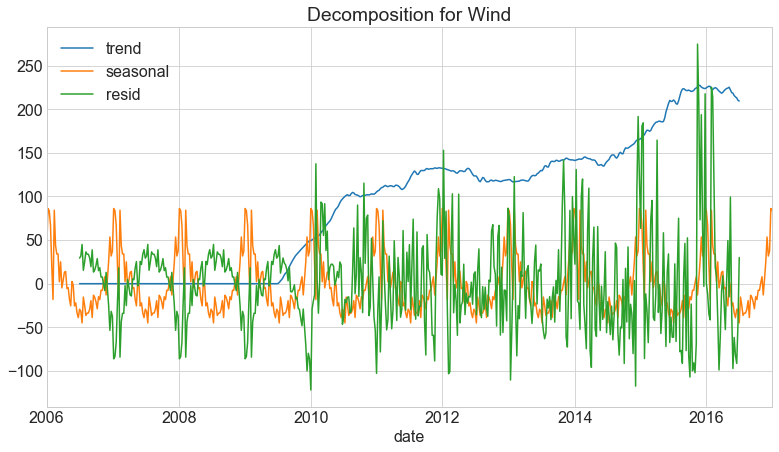

In [59]:
decomposition.iloc[:, 1:].plot()
plt.title('Decomposition for Wind')
plt.show()

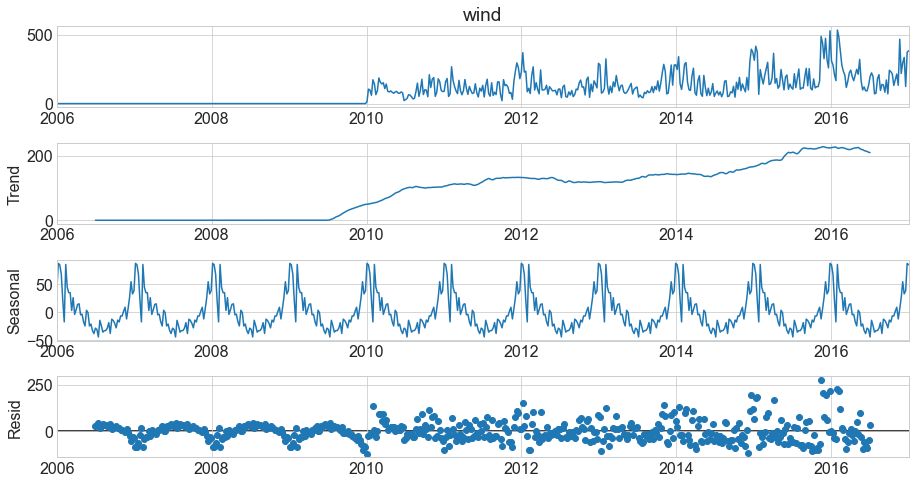

In [60]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [61]:
y = train.solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend   seasonal  resid
date                                    
2006-01-01  0.0    NaN -31.489949    NaN
2006-01-08  0.0    NaN -29.068403    NaN
2006-01-15  0.0    NaN -30.702312    NaN
2006-01-22  0.0    NaN -28.889866    NaN
2006-01-29  0.0    NaN -30.789656    NaN

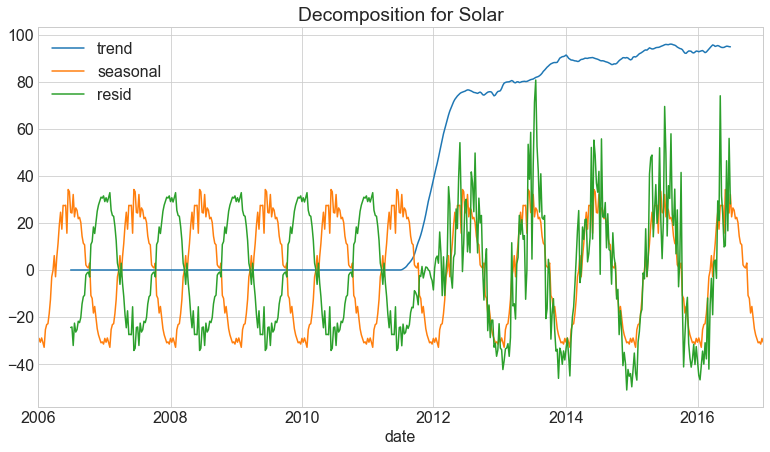

In [62]:
decomposition.iloc[:, 1:].plot()
plt.title('Decomposition for Solar')
plt.show()

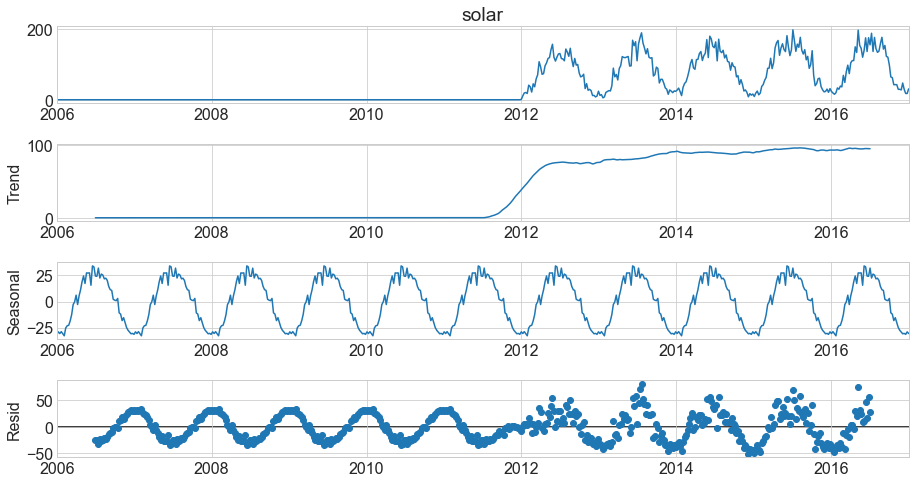

In [63]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [64]:
y = train.wind_and_solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend   seasonal  resid
date                                    
2006-01-01  0.0    NaN   5.853453    NaN
2006-01-08  0.0    NaN  57.060881    NaN
2006-01-15  0.0    NaN  52.957836    NaN
2006-01-22  0.0    NaN  38.268168    NaN
2006-01-29  0.0    NaN -10.101525    NaN

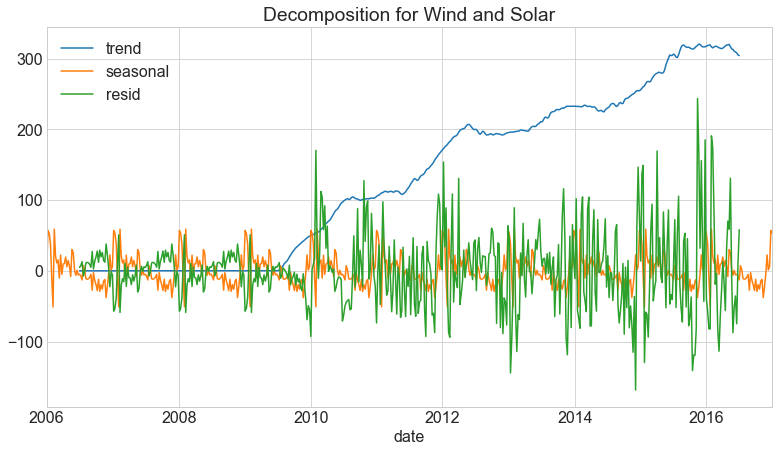

In [65]:
decomposition.iloc[:, 1:].plot()
plt.title('Decomposition for Wind and Solar')
plt.show()

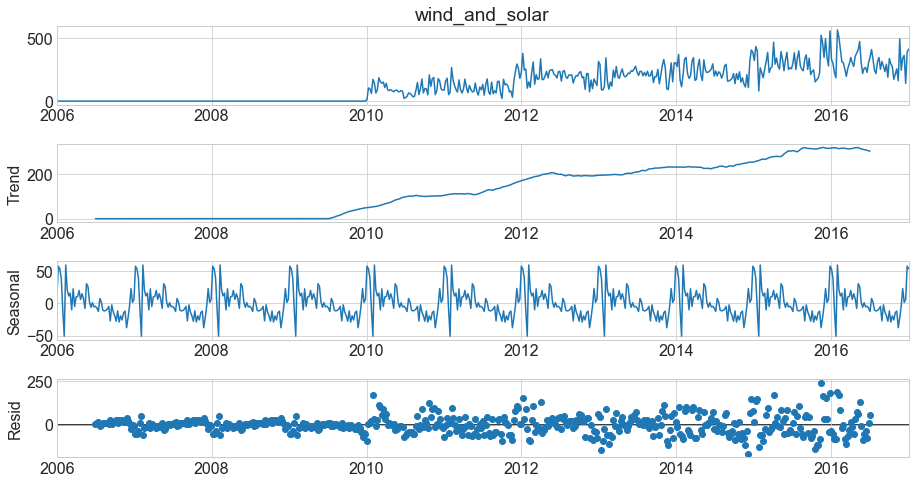

In [66]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

## Store Sales

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

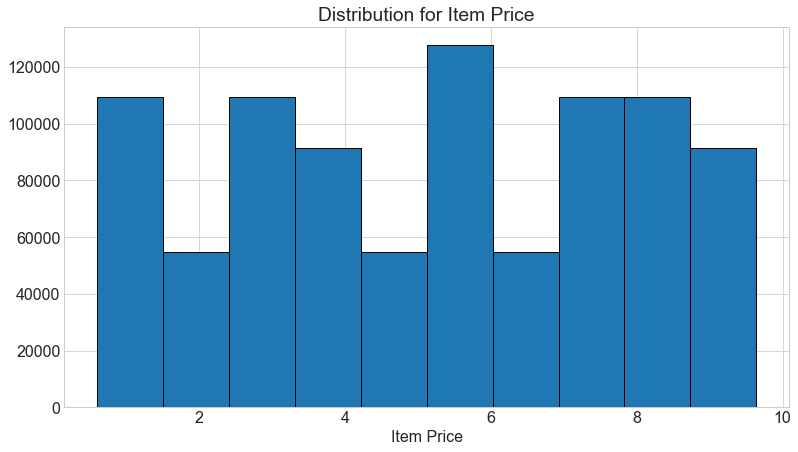

In [67]:
store = prepare_store_data()

In [70]:
store.item_name.value_counts()

Sally Hansen Nail Color Magnetic 903 Silver Elements                                                 18260
Ducal Refried Red Beans                                                                              18260
Garnier Nutritioniste Moisture Rescue Fresh Cleansing Foam                                           18260
Rice Bran Gluten Free Dinner Rolls Plain                                                             18260
Boars Head Sliced White American Cheese - 120 Ct                                                     18260
Guava                                                                                                18260
Van De Kamps Fillets Beer Battered - 10 Ct                                                           18260
Lea & Perrins Marinade In-a-bag Cracked Peppercorn                                                   18260
Back To Nature Gluten Free White Cheddar Rice Thin Crackers                                          18260
Smart Living Charcoal Lighter Fluid  

In [68]:
df = store.drop(columns = {'sale_id', 'store_address', 'store_city', 'store_id', 'store_state', 'store_zipcode', 'item_id', 'item_brand', 'item_upc12', 'item_upc14', 'month'})

In [71]:
df = df.resample('D').sum()

In [72]:
train = df[:'2015'] # includes 2015
# Create test df
test = df['2016']

### Visualize without Time Series

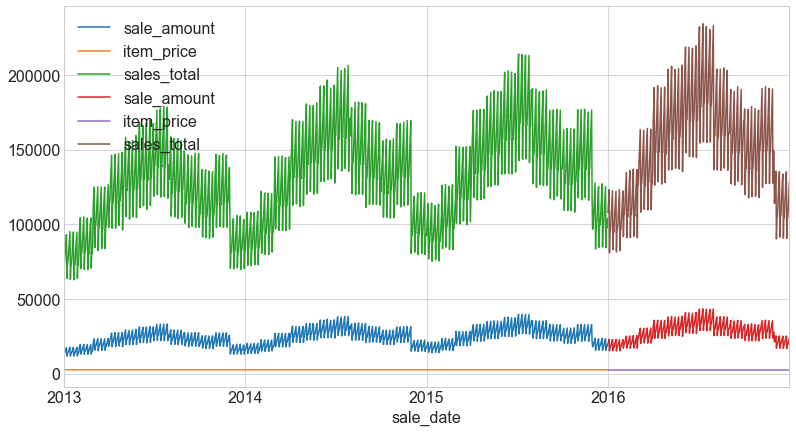

In [74]:
ax = train.plot()
test.plot(ax=ax)
plt.show()

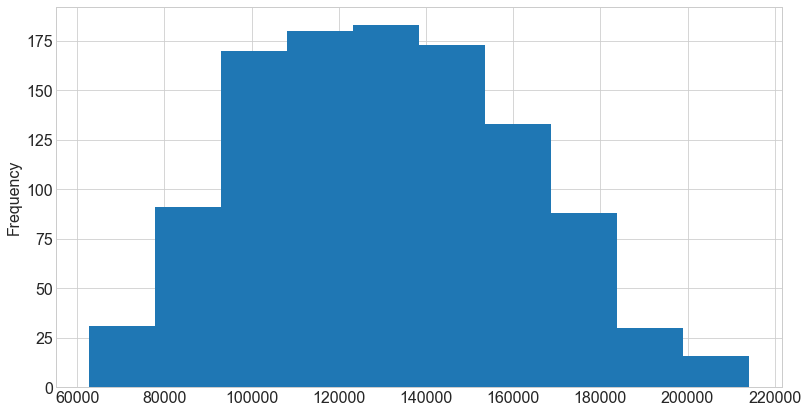

In [75]:
# Visualize y_train
y = train.sales_total
y.plot.hist()
plt.show()

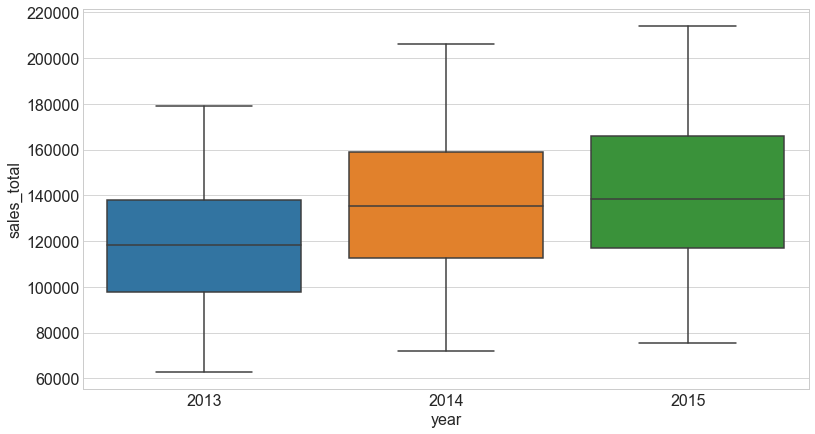

In [76]:
train['year'] = train.index.year
sns.boxplot(data = train, y='sales_total', x='year')
plt.show()

### Visualize the Target Over Time

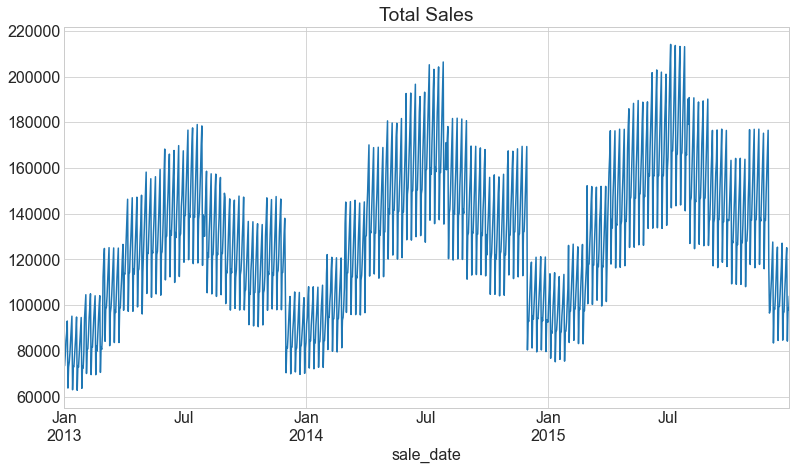

In [80]:
y.plot()
plt.title('Total Sales')
plt.show()

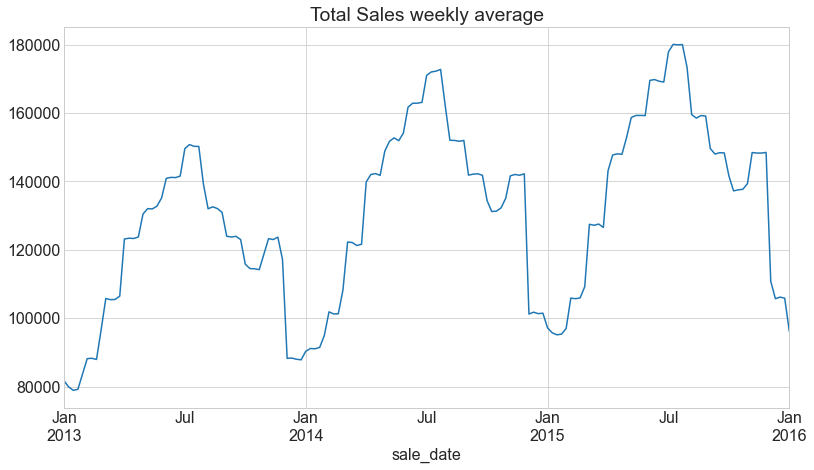

In [84]:
y.resample('W').mean().plot(title='Total Sales weekly average')
plt.show()

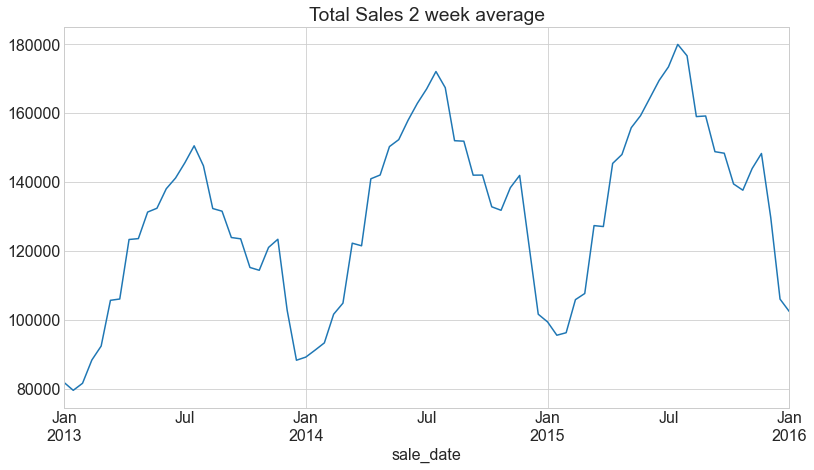

In [82]:
y.resample('2W').mean().plot(title='Total Sales 2 week average')
plt.show()

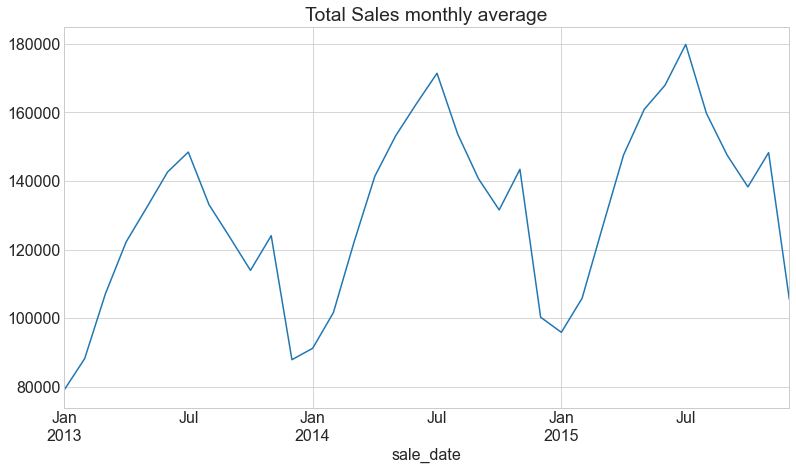

In [86]:
y.resample('M').mean().plot(title='Total Sales monthly average')
plt.show()

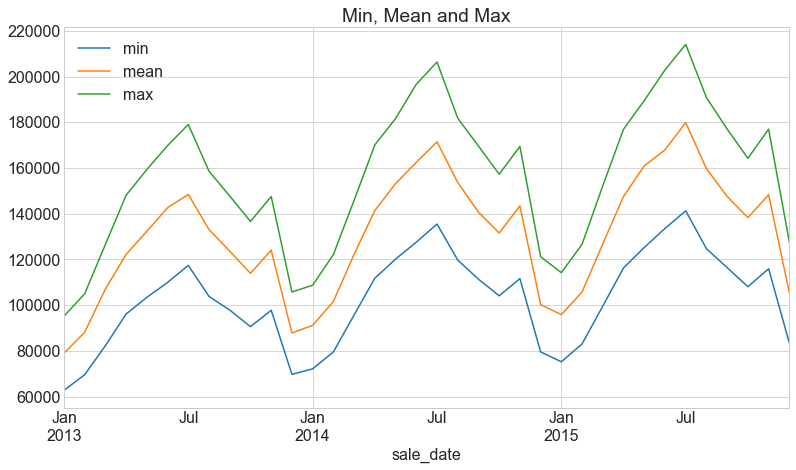

In [88]:
y.resample('M').agg(['min', 'mean', 'max']).plot()
plt.title("Min, Mean and Max")
plt.show()

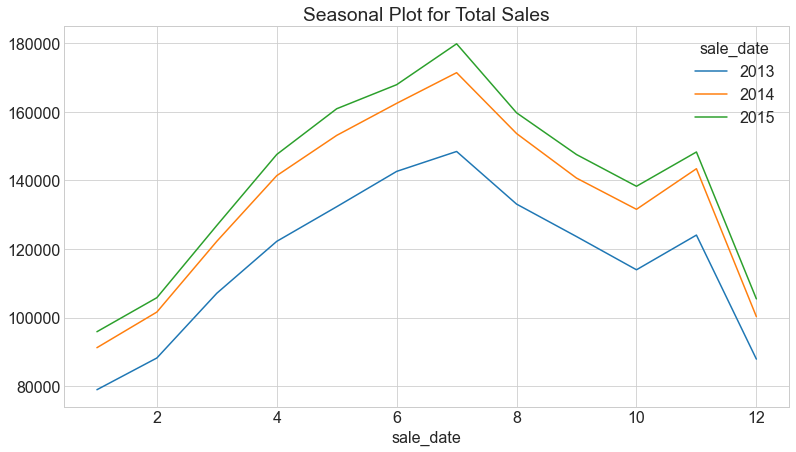

In [91]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot for Total Sales')
plt.show()

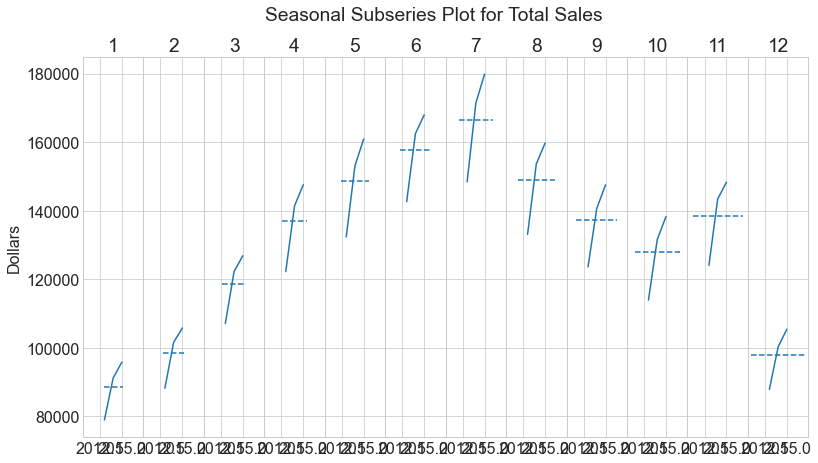

In [93]:
#with this unstack, the months become columns
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

#puts together the 12(monthly) subplots together
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    #creates the average line(dashed)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel = 'Dollars')
fig.suptitle('Seasonal Subseries Plot for Total Sales') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

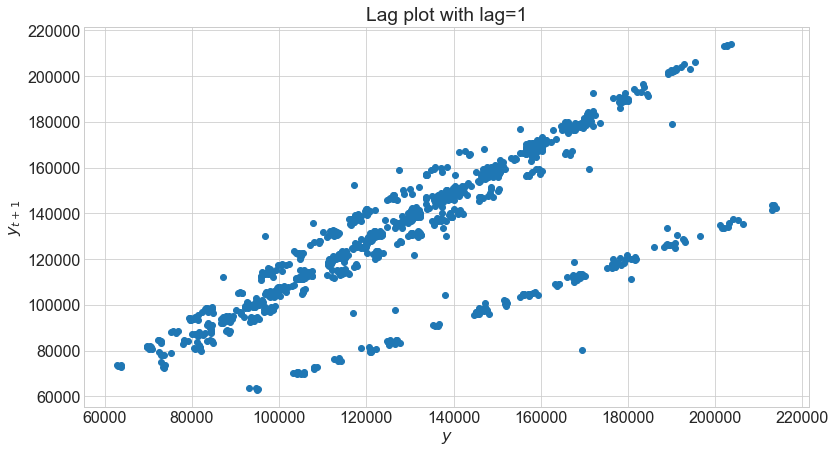

In [94]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

# train['y(t + 1)'] = train.sales_total.shift(-1)
# ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
# ax.set(xlabel='t', ylabel='t + 1')

sale_amount  item_price      this_week    year  \
sale_date                                                                    
2013-01-06 00:00:00+00:00  15177.833333      2580.2   81794.583333  2013.0   
2013-01-13 00:00:00+00:00  14843.142857      2580.2   79990.601429  2013.0   
2013-01-20 00:00:00+00:00  14707.142857      2580.2   78973.360000  2013.0   
2013-01-27 00:00:00+00:00  14756.857143      2580.2   79272.691429  2013.0   
2013-02-03 00:00:00+00:00  15575.285714      2580.2   83792.507143  2013.0   
...                                 ...         ...            ...     ...   
2015-12-06 00:00:00+00:00  20585.571429      2580.2  110847.644286  2015.0   
2015-12-13 00:00:00+00:00  19658.571429      2580.2  105751.867143  2015.0   
2015-12-20 00:00:00+00:00  19755.142857      2580.2  106217.608571  2015.0   
2015-12-27 00:00:00+00:00  19671.428571      2580.2  105900.275714  2015.0   
2016-01-03 00:00:00+00:00  17885.000000      2580.2   96160.680000  2015.0   

                                y(t + 1)  the_next_week  
sale_date                                                
2013-01-06 00:00:00+00:00   80116.838333   79990.601429  
2013-01-13 00:00:00+00:00   79884.427143   78973.360000  
2013-01-20 00:00:00+00:00   78938.260000   79272.691429  
2013-01-27 00:00:00+00:00   79398.127143   83792.507143  
2013-02-03 00:00:00+00:00   84716.047143   88227.801429  
...                                  ...            ...  
2015-12-06 00:00:00+00:00  106068.528571  105751.867143  
2015-12-13 00:00:00+00:00  105912.010000  106217.608571  
2015-12-20 00:00:00+00:00  106236.561429  105900.275714  
2015-12-27 00:00:00+00:00  105838.750000   96160.680000  
2016-01-03 00:00:00+00:00  100115.090000            NaN  

[157 rows x 6 columns]

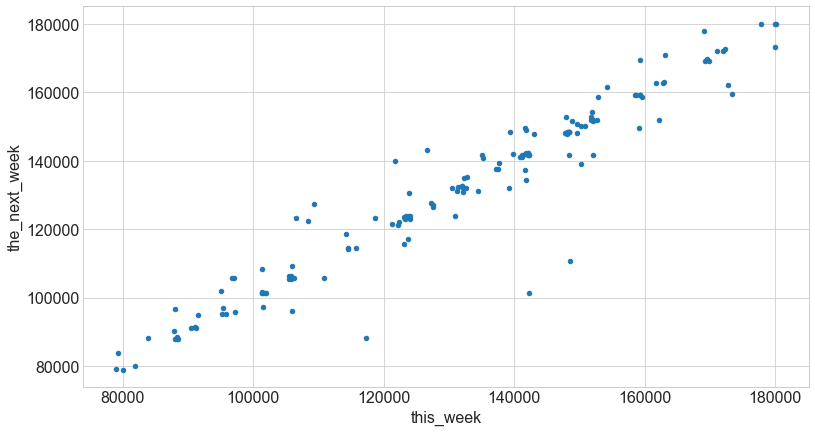

In [100]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

sale_amount  item_price      this_week    year  \
sale_date                                                                    
2013-01-06 00:00:00+00:00  15177.833333      2580.2   81794.583333  2013.0   
2013-01-13 00:00:00+00:00  14843.142857      2580.2   79990.601429  2013.0   
2013-01-20 00:00:00+00:00  14707.142857      2580.2   78973.360000  2013.0   
2013-01-27 00:00:00+00:00  14756.857143      2580.2   79272.691429  2013.0   
2013-02-03 00:00:00+00:00  15575.285714      2580.2   83792.507143  2013.0   
...                                 ...         ...            ...     ...   
2015-12-06 00:00:00+00:00  20585.571429      2580.2  110847.644286  2015.0   
2015-12-13 00:00:00+00:00  19658.571429      2580.2  105751.867143  2015.0   
2015-12-20 00:00:00+00:00  19755.142857      2580.2  106217.608571  2015.0   
2015-12-27 00:00:00+00:00  19671.428571      2580.2  105900.275714  2015.0   
2016-01-03 00:00:00+00:00  17885.000000      2580.2   96160.680000  2015.0   

                                y(t + 1)   12_weeks_out  
sale_date                                                
2013-01-06 00:00:00+00:00   80116.838333  106501.331429  
2013-01-13 00:00:00+00:00   79884.427143  123193.640000  
2013-01-20 00:00:00+00:00   78938.260000  123430.685714  
2013-01-27 00:00:00+00:00   79398.127143  123345.042857  
2013-02-03 00:00:00+00:00   84716.047143  123791.114286  
...                                  ...            ...  
2015-12-06 00:00:00+00:00  106068.528571            NaN  
2015-12-13 00:00:00+00:00  105912.010000            NaN  
2015-12-20 00:00:00+00:00  106236.561429            NaN  
2015-12-27 00:00:00+00:00  105838.750000            NaN  
2016-01-03 00:00:00+00:00  100115.090000            NaN  

[157 rows x 6 columns]

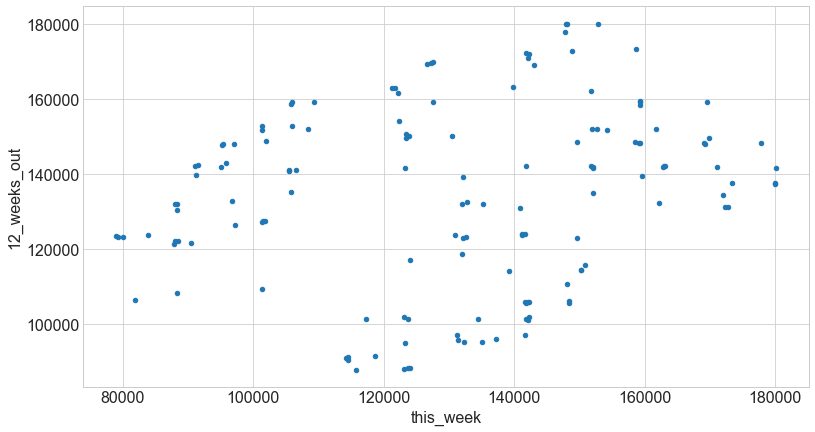

In [101]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

sale_amount  item_price      this_week    year  \
sale_date                                                                    
2013-01-06 00:00:00+00:00  15177.833333      2580.2   81794.583333  2013.0   
2013-01-13 00:00:00+00:00  14843.142857      2580.2   79990.601429  2013.0   
2013-01-20 00:00:00+00:00  14707.142857      2580.2   78973.360000  2013.0   
2013-01-27 00:00:00+00:00  14756.857143      2580.2   79272.691429  2013.0   
2013-02-03 00:00:00+00:00  15575.285714      2580.2   83792.507143  2013.0   
...                                 ...         ...            ...     ...   
2015-12-06 00:00:00+00:00  20585.571429      2580.2  110847.644286  2015.0   
2015-12-13 00:00:00+00:00  19658.571429      2580.2  105751.867143  2015.0   
2015-12-20 00:00:00+00:00  19755.142857      2580.2  106217.608571  2015.0   
2015-12-27 00:00:00+00:00  19671.428571      2580.2  105900.275714  2015.0   
2016-01-03 00:00:00+00:00  17885.000000      2580.2   96160.680000  2015.0   

                                y(t + 1)  half_a_year_later  
sale_date                                                    
2013-01-06 00:00:00+00:00   80116.838333      149604.697143  
2013-01-13 00:00:00+00:00   79884.427143      150789.424286  
2013-01-20 00:00:00+00:00   78938.260000      150282.567143  
2013-01-27 00:00:00+00:00   79398.127143      150242.265714  
2013-02-03 00:00:00+00:00   84716.047143      139188.128571  
...                                  ...                ...  
2015-12-06 00:00:00+00:00  106068.528571                NaN  
2015-12-13 00:00:00+00:00  105912.010000                NaN  
2015-12-20 00:00:00+00:00  106236.561429                NaN  
2015-12-27 00:00:00+00:00  105838.750000                NaN  
2016-01-03 00:00:00+00:00  100115.090000                NaN  

[157 rows x 6 columns]

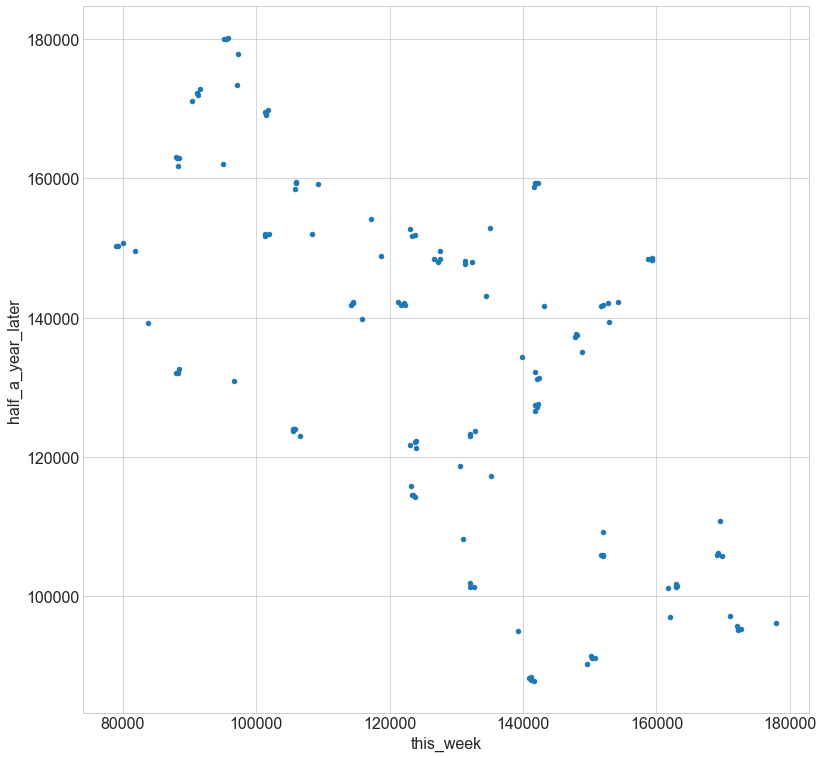

In [102]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly



# pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

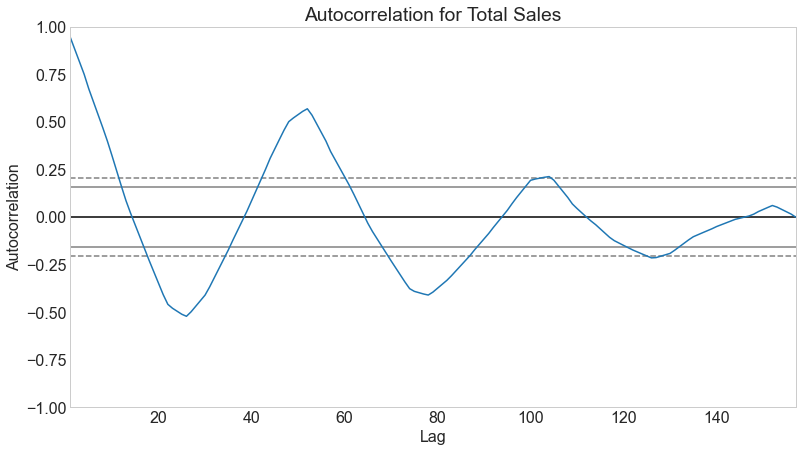

In [105]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.title("Autocorrelation for Total Sales")
plt.show()

In [107]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend      seasonal  resid
sale_date                                                          
2013-01-06 00:00:00+00:00  81794.583333    NaN -37435.450173    NaN
2013-01-13 00:00:00+00:00  79990.601429    NaN -38017.166821    NaN
2013-01-20 00:00:00+00:00  78973.360000    NaN -38637.757797    NaN
2013-01-27 00:00:00+00:00  79272.691429    NaN -38633.862371    NaN
2013-02-03 00:00:00+00:00  83792.507143    NaN -36345.604129    NaN

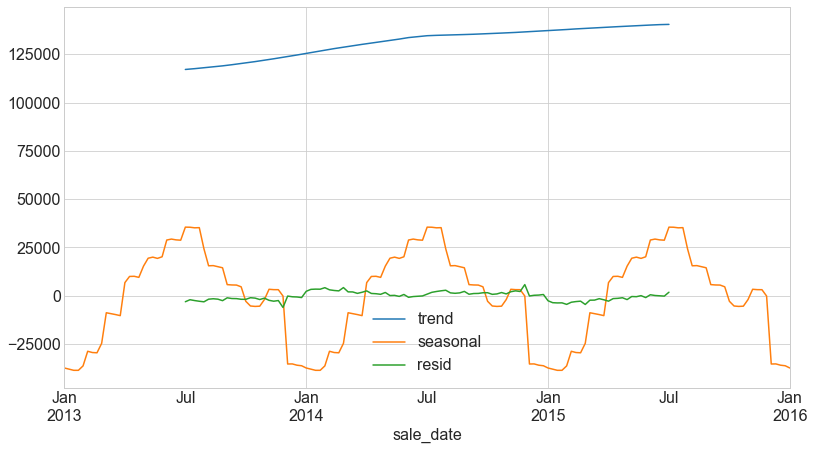

In [109]:
decomposition.iloc[:, 1:].plot()
plt.show()

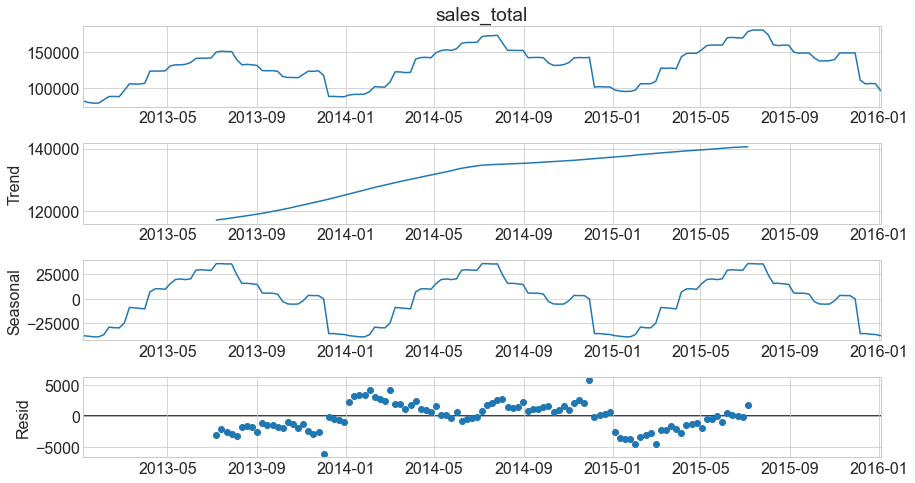

In [110]:
result.plot()
None

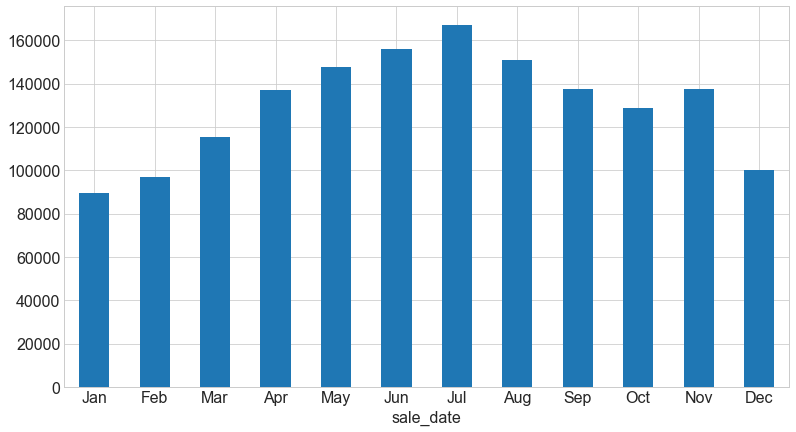

In [111]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

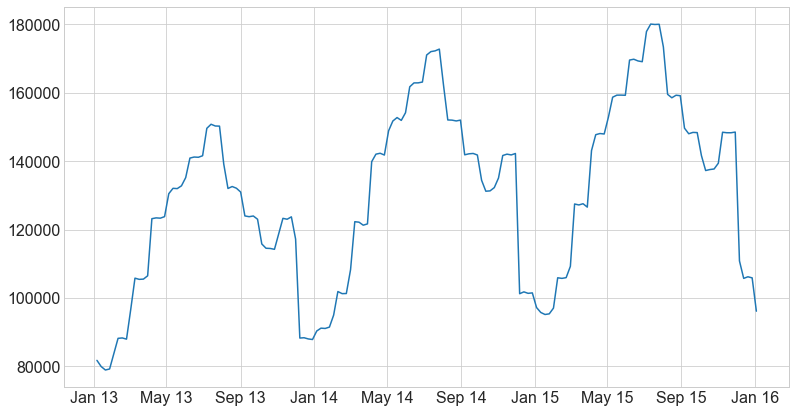

In [112]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

In [113]:
store.head()

sale_amount  sale_id           store_address  \
sale_date                                                                 
2013-01-01 00:00:00+00:00         13.0        1  12125 Alamo Ranch Pkwy   
2013-01-01 00:00:00+00:00         26.0   211817  12018 Perrin Beitel Rd   
2013-01-01 00:00:00+00:00         27.0   832657  12018 Perrin Beitel Rd   
2013-01-01 00:00:00+00:00         54.0   213643     15000 San Pedro Ave   
2013-01-01 00:00:00+00:00         35.0   215469      735 SW Military Dr   

                            store_city  store_id store_state  store_zipcode  \
sale_date                                                                     
2013-01-01 00:00:00+00:00  San Antonio         1          TX          78253   
2013-01-01 00:00:00+00:00  San Antonio         7          TX          78217   
2013-01-01 00:00:00+00:00  San Antonio         7          TX          78217   
2013-01-01 00:00:00+00:00  San Antonio         8          TX          78232   
2013-01-01 00:00:00+00:00  San Antonio         9          TX          78221   

                           item_brand  item_id  \
sale_date                                        
2013-01-01 00:00:00+00:00    Riceland        1   
2013-01-01 00:00:00+00:00     Mueller       12   
2013-01-01 00:00:00+00:00  Mama Marys       46   
2013-01-01 00:00:00+00:00     Mueller       12   
2013-01-01 00:00:00+00:00     Mueller       12   

                                                                   item_name  \
sale_date                                                                      
2013-01-01 00:00:00+00:00                     Riceland American Jazmine Rice   
2013-01-01 00:00:00+00:00  Mueller Sport Care Basic Support Level Medium ...   
2013-01-01 00:00:00+00:00                                        Pizza Sauce   
2013-01-01 00:00:00+00:00  Mueller Sport Care Basic Support Level Medium ...   
2013-01-01 00:00:00+00:00  Mueller Sport Care Basic Support Level Medium ...   

                           item_price   item_upc12   item_upc14  month  \
sale_date                                                                
2013-01-01 00:00:00+00:00        0.84  35200264013  35200264013      1   
2013-01-01 00:00:00+00:00        8.40  74676640211  74676640211      1   
2013-01-01 00:00:00+00:00        4.65  35457770664  35457770664      1   
2013-01-01 00:00:00+00:00        8.40  74676640211  74676640211      1   
2013-01-01 00:00:00+00:00        8.40  74676640211  74676640211      1   

                          day_of_the_week  sales_total  
sale_date                                               
2013-01-01 00:00:00+00:00         Tuesday        10.92  
2013-01-01 00:00:00+00:00         Tuesday       218.40  
2013-01-01 00:00:00+00:00         Tuesday       125.55  
2013-01-01 00:00:00+00:00         Tuesday       453.60  
2013-01-01 00:00:00+00:00         Tuesday       294.00

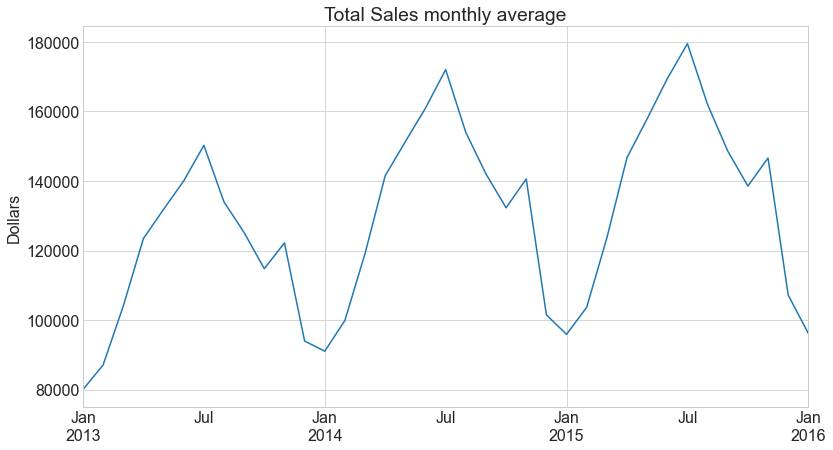

In [180]:
y.resample('M').mean().plot(title='Total Sales monthly average')
plt.xlabel('')
plt.ylabel('Dollars')
plt.show()

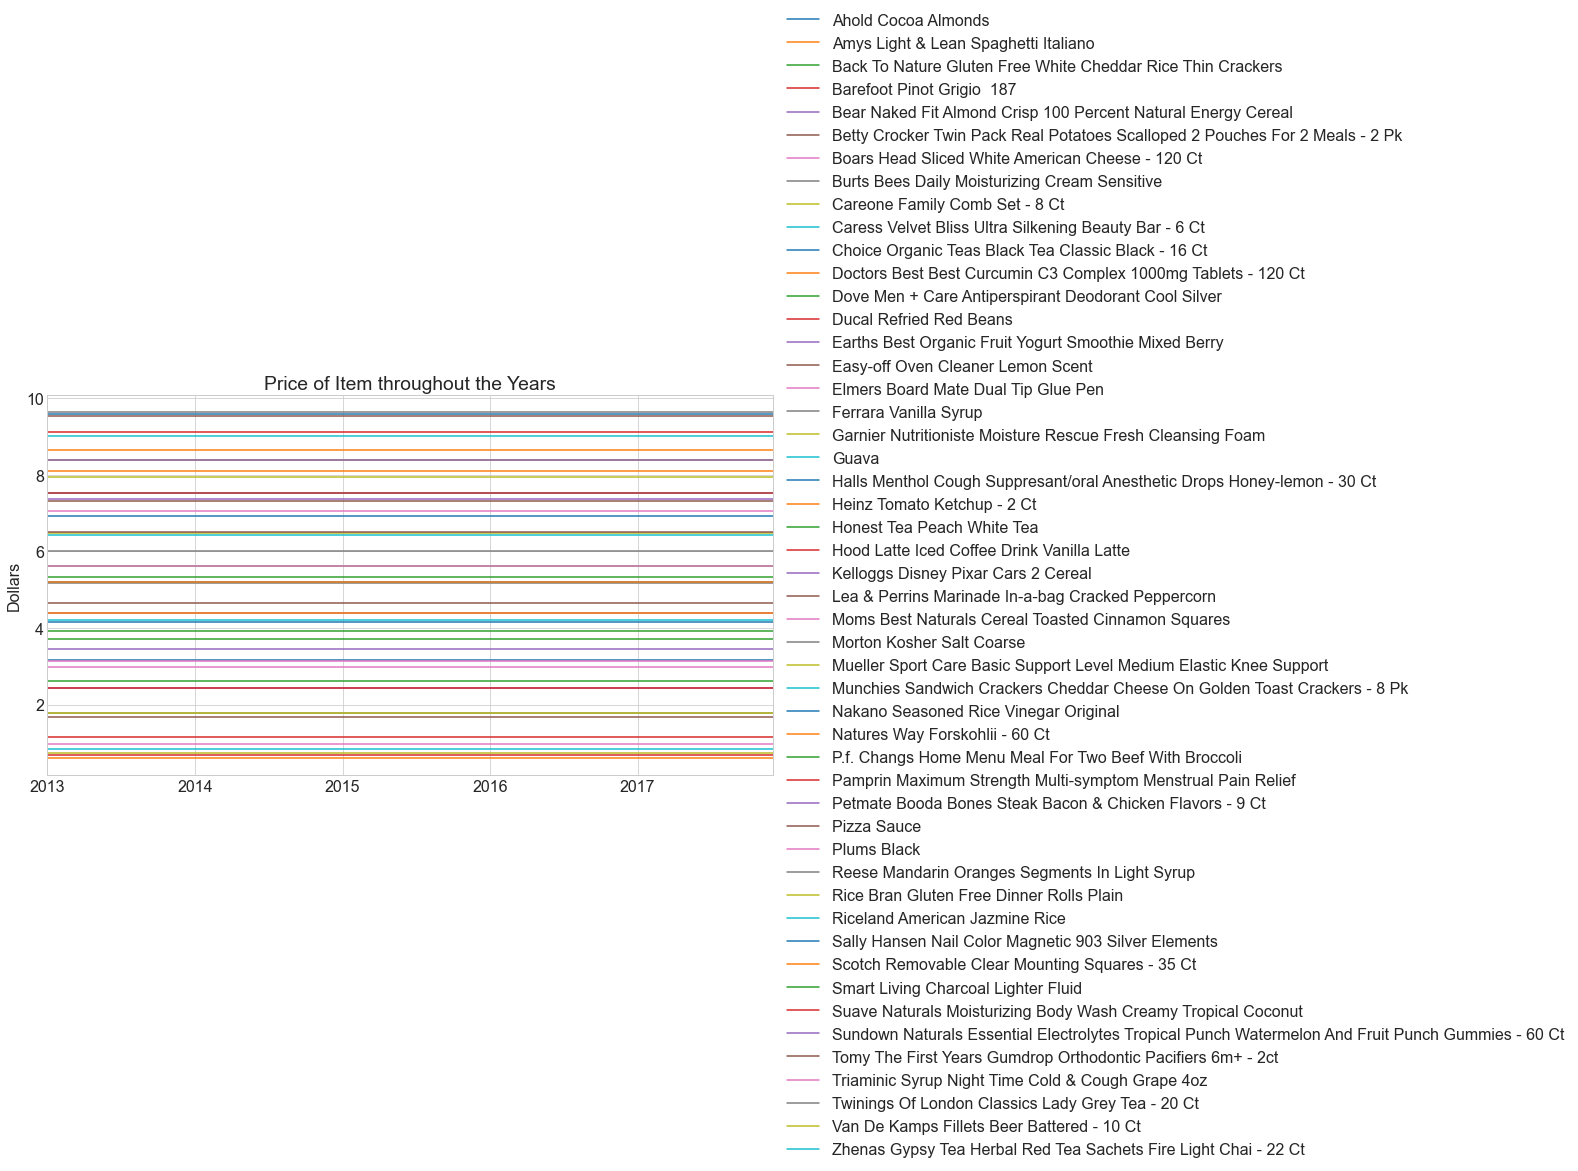

In [168]:
store.groupby('item_name').resample('M').item_price.mean().unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Price of Item throughout the Years')
plt.ylabel('Dollars')
plt.xlabel('')
plt.show()

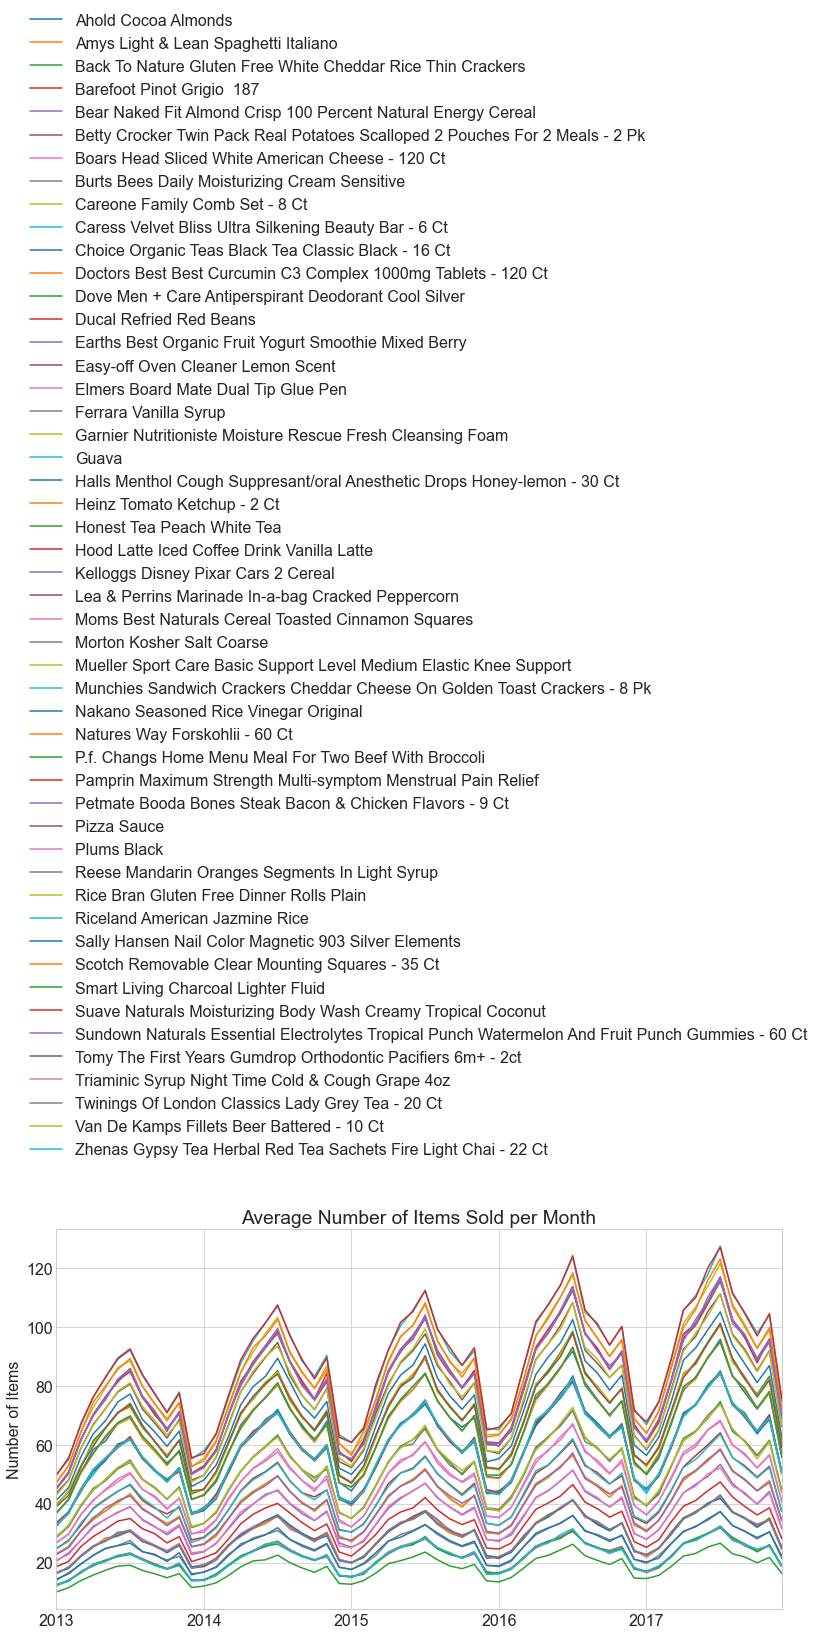

In [197]:
store.groupby('item_name').resample('M').sale_amount.mean().unstack(0).plot()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.15))
plt.title('Average Number of Items Sold per Month')
plt.xlabel('')
plt.ylabel('Number of Items')
plt.show()

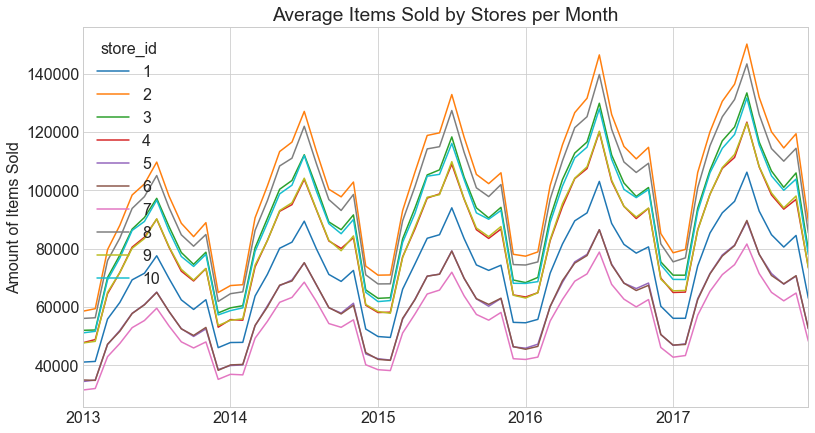

In [196]:
store.groupby('store_id').resample('M').sale_amount.sum().unstack(0).plot()
plt.title('Average Items Sold by Stores per Month')
plt.ylabel('Amount of Items Sold')
plt.xlabel('')
plt.show()